In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from matplotlib.ticker import FuncFormatter
from scipy.stats import mode
import math
# Apply Gaussian smoothing
from scipy.ndimage import gaussian_filter

### This notebook includes all of the code used to plot the figures seen in the Traffic Monitoring Using Doppler Radar EEE4022S project Results Section.

# Results Section Plots

### Figure 7.1

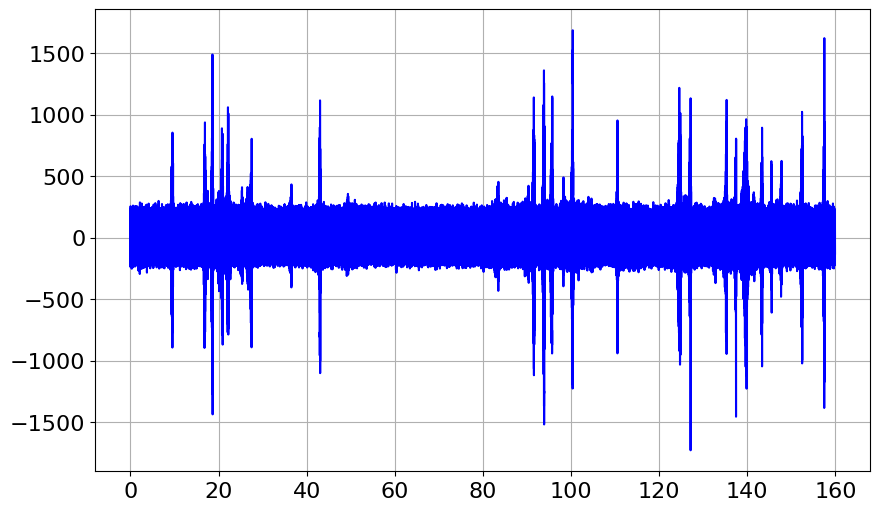

In [2]:
# Replace 'your_wav_file.wav' with the path to your WAV file
wav_file = 'Data/openTest2.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

# Calculate the time values for the x-axis
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the voltage-time graph
plt.figure(figsize=(10, 6))
plt.plot(time, audio_data, color='b')
#plt.xlabel('Time (s)', fontsize = '20')
#plt.ylabel('Amplitude', fontsize = '20')
#plt.title('Voltage-Time Plot')
plt.xticks(fontsize=16)  # Set x-axis tick label fontsize
plt.yticks(fontsize=16)  # Set y-axis tick label fontsize
plt.grid(True)
plt.savefig('Test1TimeDomain.pdf', format='pdf', bbox_inches='tight')
plt.show()

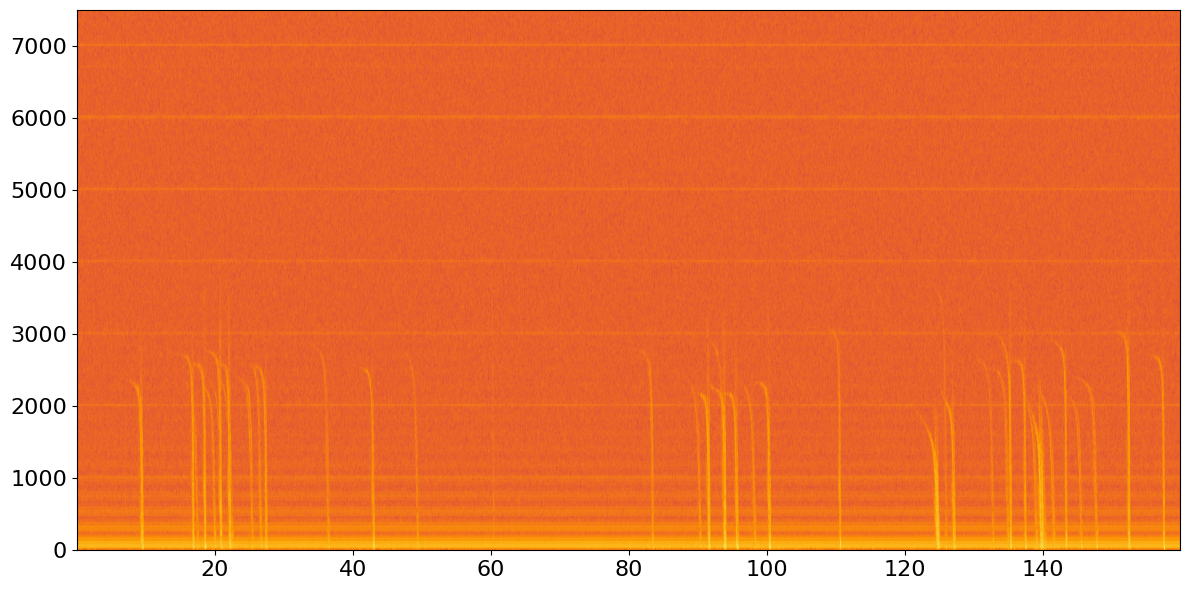

In [3]:
# Preprocess the audio data (optional)
# audio_data = preprocess_audio(audio_data)

# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Apply Gaussian smoothing
from scipy.ndimage import gaussian_filter
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 0.5))

# Change the colormap for better contrast
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_smoothed, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)

# Adjust the color scale for dynamic range
#plt.colorbar(label='dB', format='%+2.0f dB')
#plt.clim(vmin=-60, vmax=0)

#plt.xlabel('Time (s)', fontsize = '20')
#plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xticks(fontsize=16)  # Set x-axis tick label fontsize
plt.yticks(fontsize=16)  # Set y-axis tick label fontsize
plt.tight_layout()
plt.savefig('Test1Spectrogram.pdf', format='pdf')
plt.show()

### Figure 7.2

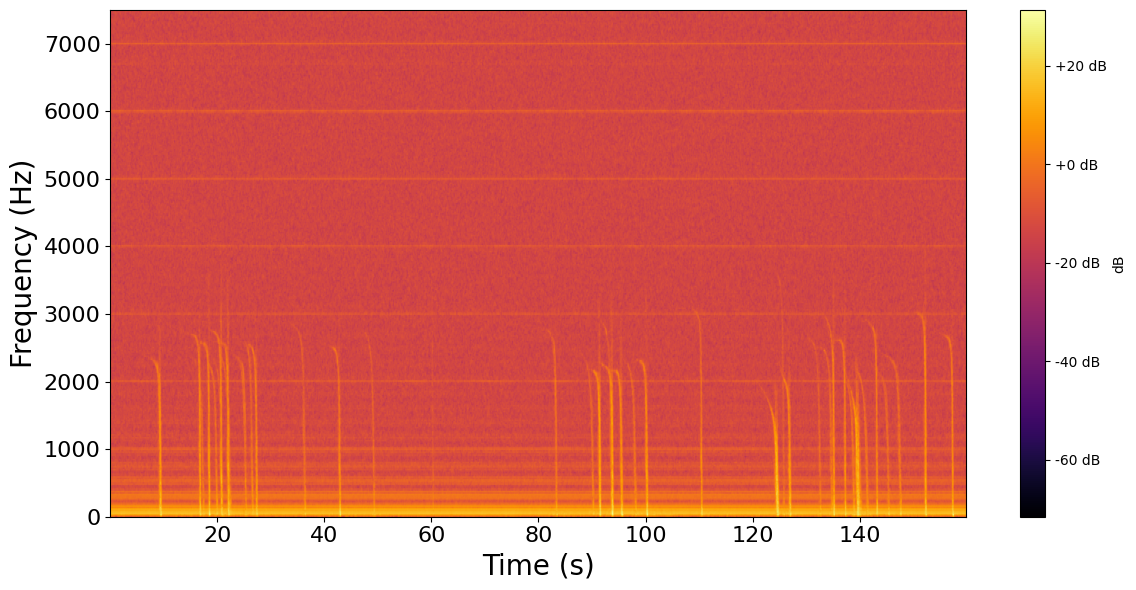

In [4]:
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Change the colormap for better contrast
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_smoothed, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)

# Adjust the color scale for dynamic range
plt.colorbar(label='dB', format='%+2.0f dB')
#plt.clim(vmin=-60, vmax=0)

plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xticks(fontsize=16)  # Set x-axis tick label fontsize
plt.yticks(fontsize=16)  # Set y-axis tick label fontsize
plt.tight_layout()
plt.savefig('Test1SpectrogramAfterSmoothing.pdf', format = 'pdf')
plt.show()

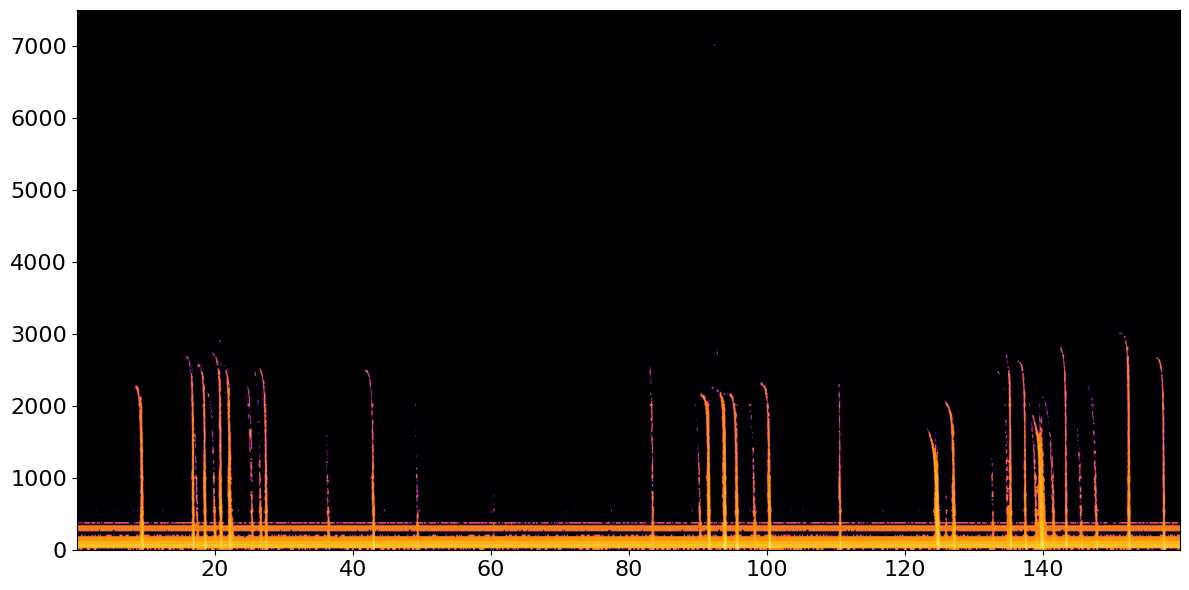

In [5]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Apply thresholding
threshold_db = -3  # Threshold in dB
min_db = -80  # Minimum value for frequencies below the threshold
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, min_db)

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.ylim(0, 7500)
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
#plt.colorbar(label='dB', format='%+2.0f dB')
#plt.xlabel('Time (s)', fontsize = '20')
#plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xticks(fontsize=16)  # Set x-axis tick label fontsize
plt.yticks(fontsize=16)  # Set y-axis tick label fontsize
plt.tight_layout()
plt.savefig('Test1SpectrogramAfterThresholding.pdf', format = 'pdf')
plt.show()

### Figure 7.3

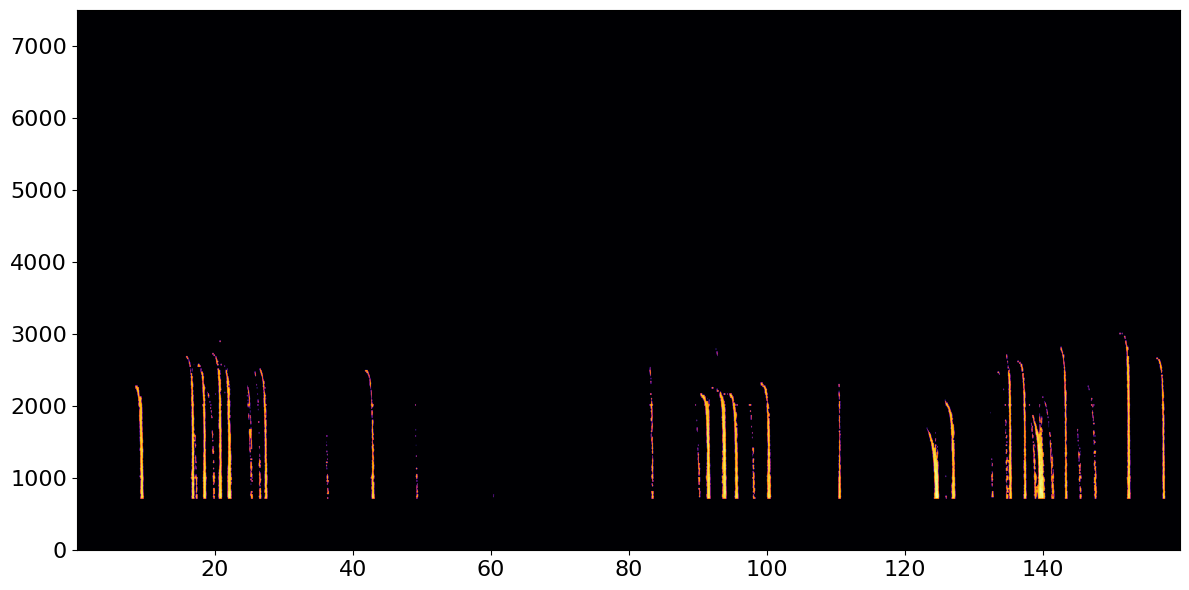

In [6]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Apply thresholding
threshold_db = -3  # Threshold in dB
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, -80)

# Set all frequencies below 200 Hz and above 7000 Hz to -80 dB
lower_freq_limit = 700
upper_freq_limit = 7000

# Find the frequency indices corresponding to the limits
lower_freq_index = np.argmin(np.abs(frequencies - lower_freq_limit))
upper_freq_index = np.argmin(np.abs(frequencies - upper_freq_limit))

# Set the values outside the frequency limits to -80 dB
Sxx_thresholded[:lower_freq_index, :] = -80
Sxx_thresholded[upper_freq_index:, :] = -80

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.ylim(0, 7500)
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
#plt.colorbar(label='dB', format='%+2.0f dB')
#plt.xlabel('Time (s)', fontsize = '20')
#plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.xticks(fontsize=16)  # Set x-axis tick label fontsize
plt.yticks(fontsize=16)  # Set y-axis tick label fontsize
plt.tight_layout()
plt.savefig('Test1SpectrogramAfterRemovingFrequencies.pdf', format = 'pdf')
plt.show()

### Figure 7.4

Group with 14 points >= 0 dB at times: 9.311201814058958 - 9.636281179138322
max speed =  57.31270793726235


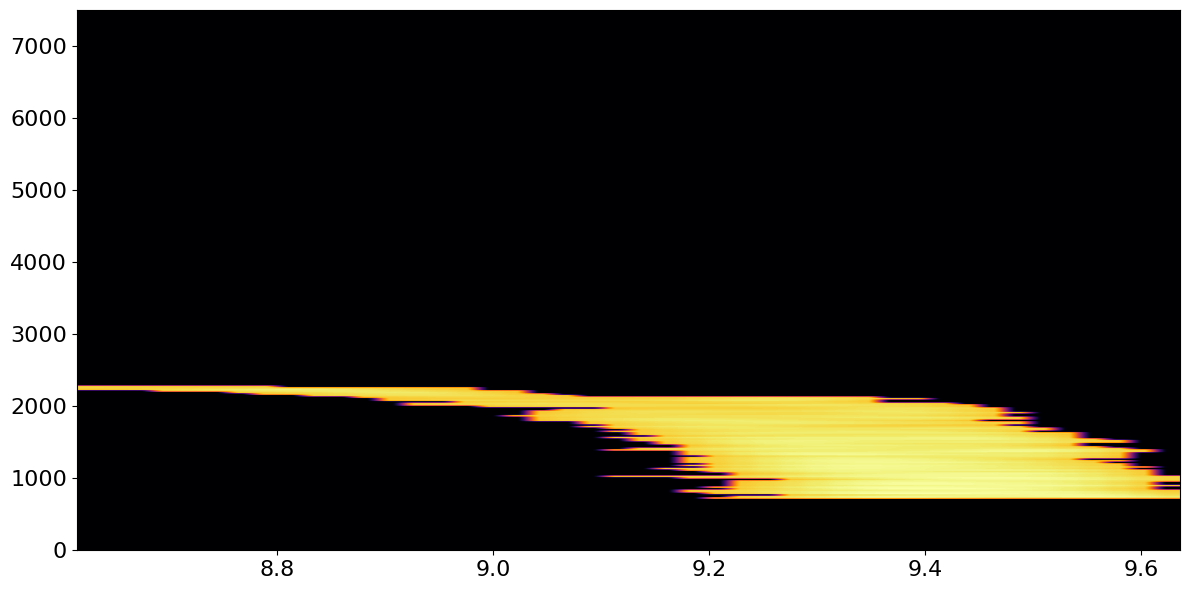

Group with 15 points >= 0 dB at times: 16.671927437641724 - 17.020226757369613
max speed =  67.68357889733839


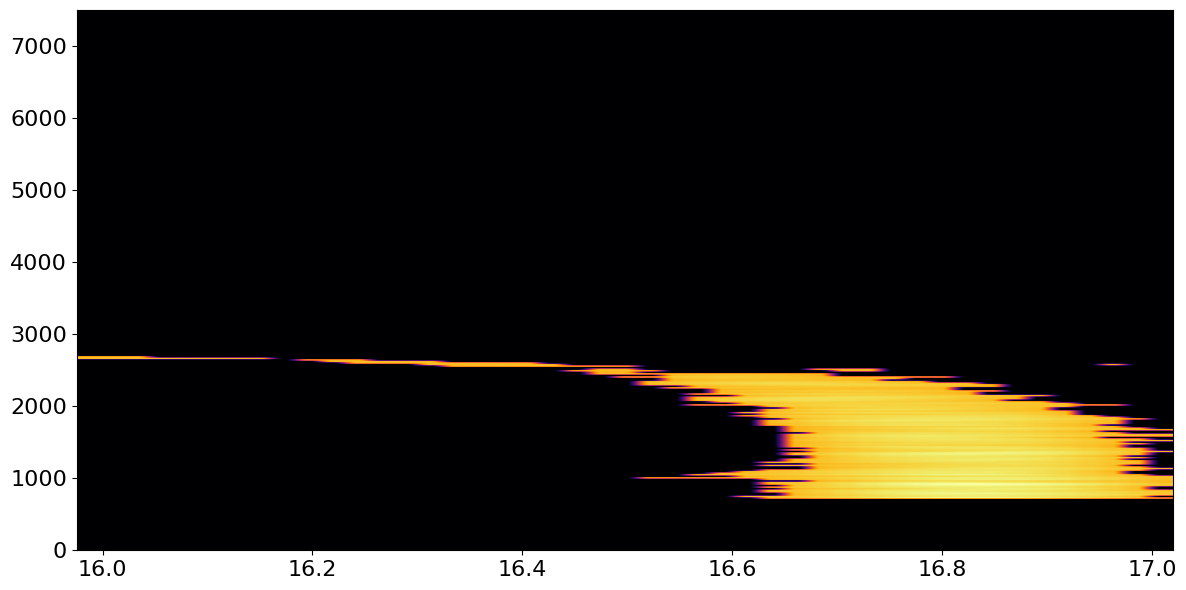

Group with 18 points >= 0 dB at times: 18.297324263038547 - 18.715283446712018
max speed =  64.95440232889733


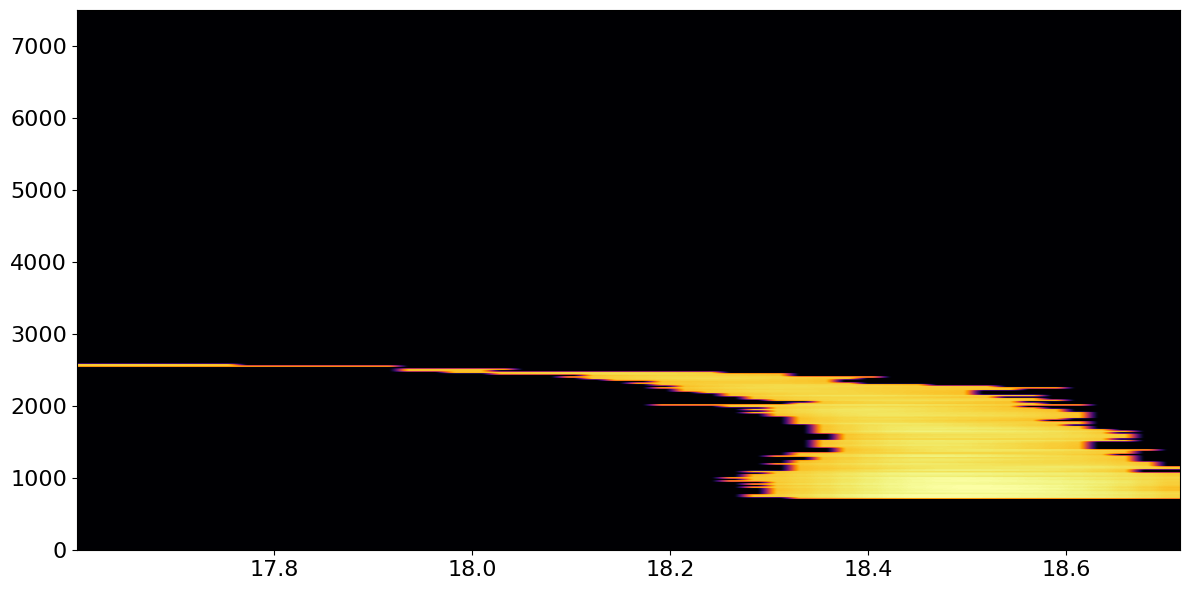

Group with 20 points >= 0 dB at times: 20.54965986394558 - 21.0140589569161
max speed =  73.14193203422053


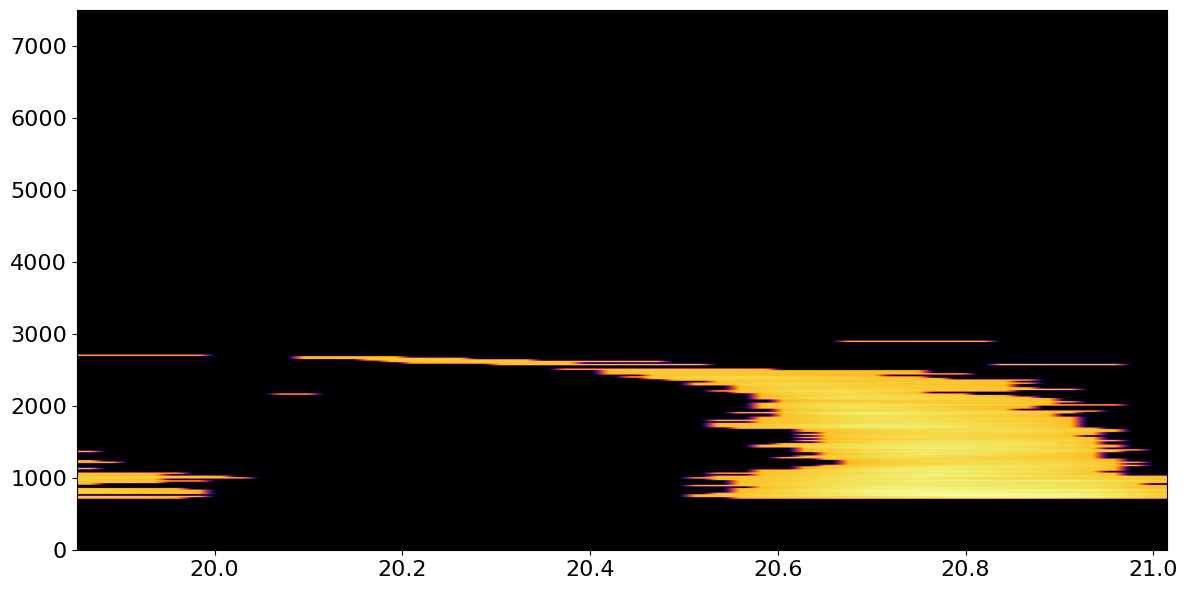

Group with 21 points >= 0 dB at times: 21.849977324263037 - 22.337596371882086
max speed =  64.40856701520912


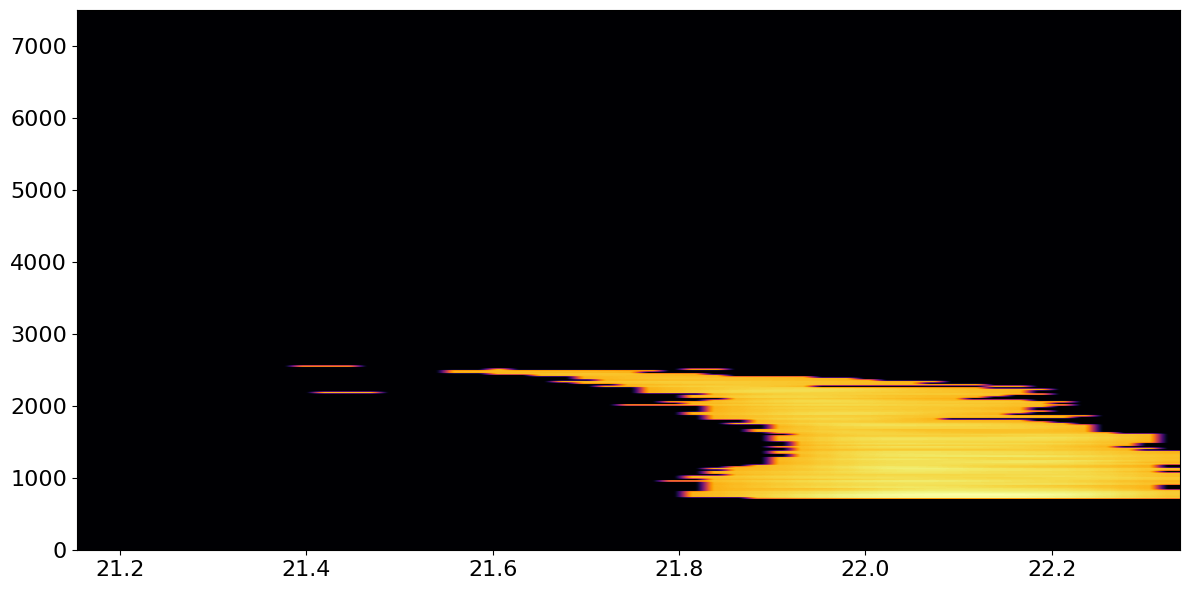

Group with 11 points >= 0 dB at times: 27.30666666666667 - 27.562086167800455
max speed =  63.31689638783269


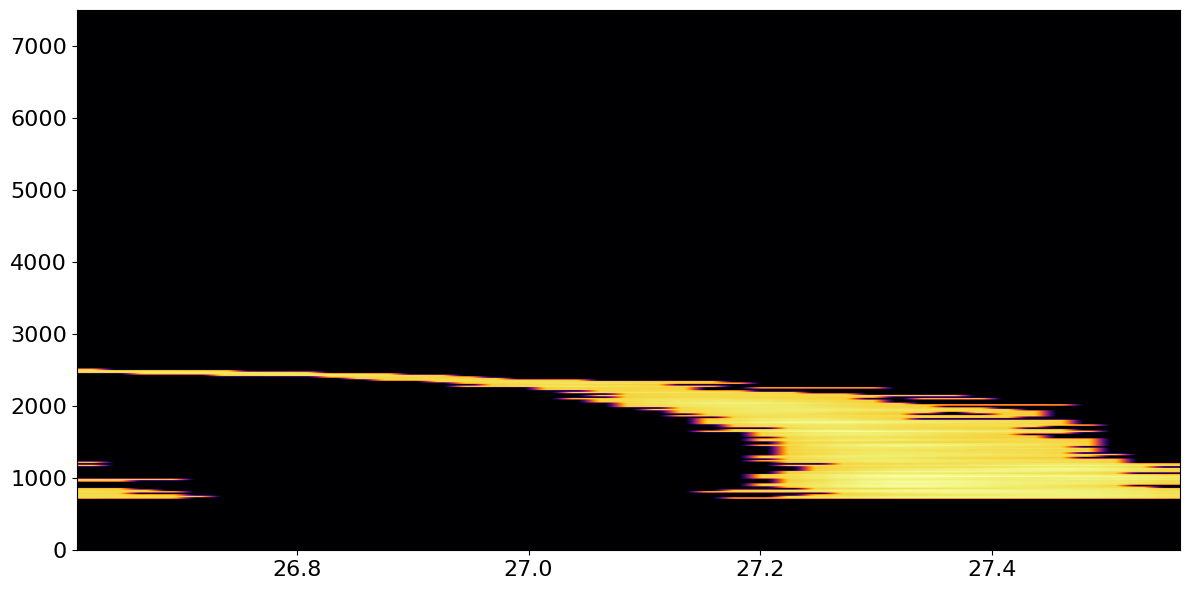

Group with 14 points >= 0 dB at times: 42.72471655328798 - 43.049795918367344
max speed =  62.771061074144484


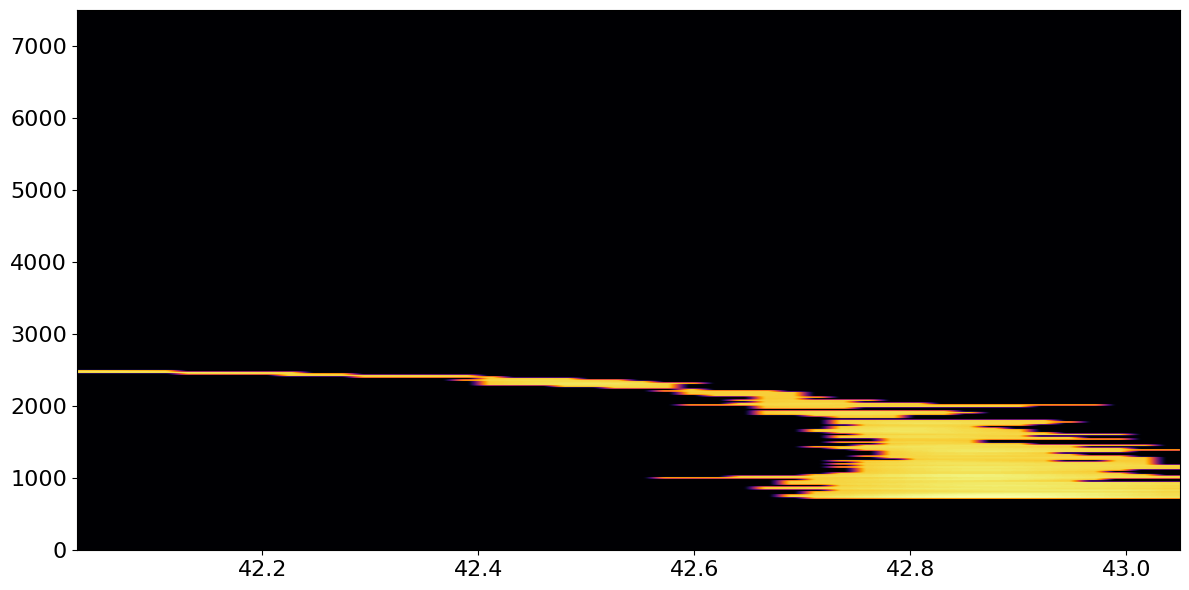

Group with 21 points >= 0 dB at times: 91.23120181405896 - 91.71882086167801
max speed =  54.58353136882129


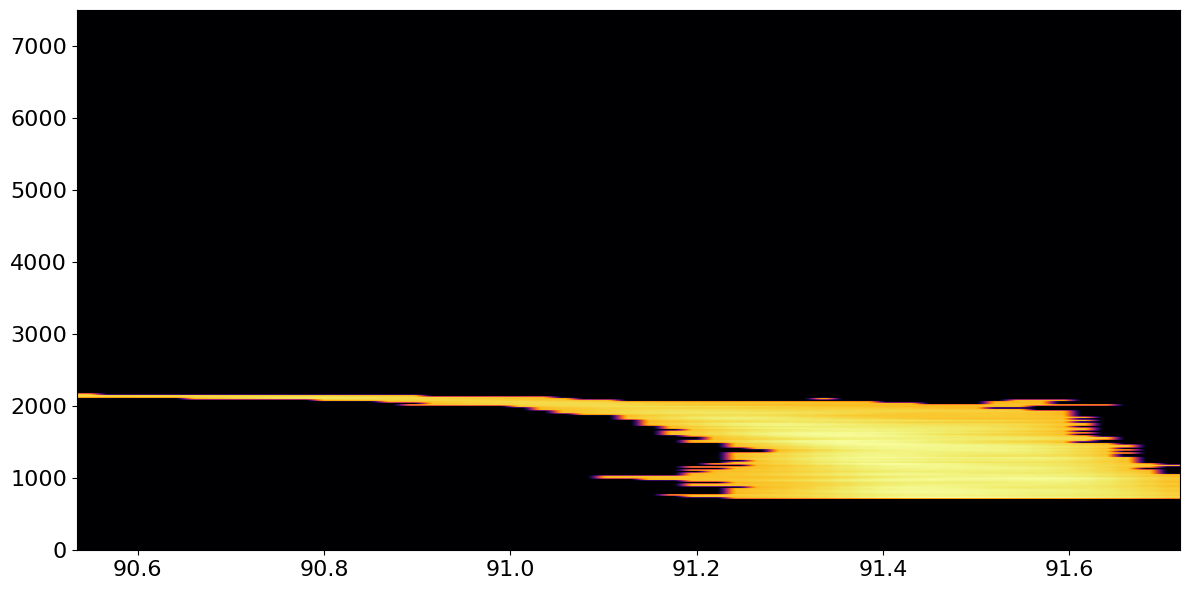

Group with 25 points >= 0 dB at times: 93.46031746031746 - 94.04081632653062
max speed =  68.77524952471482


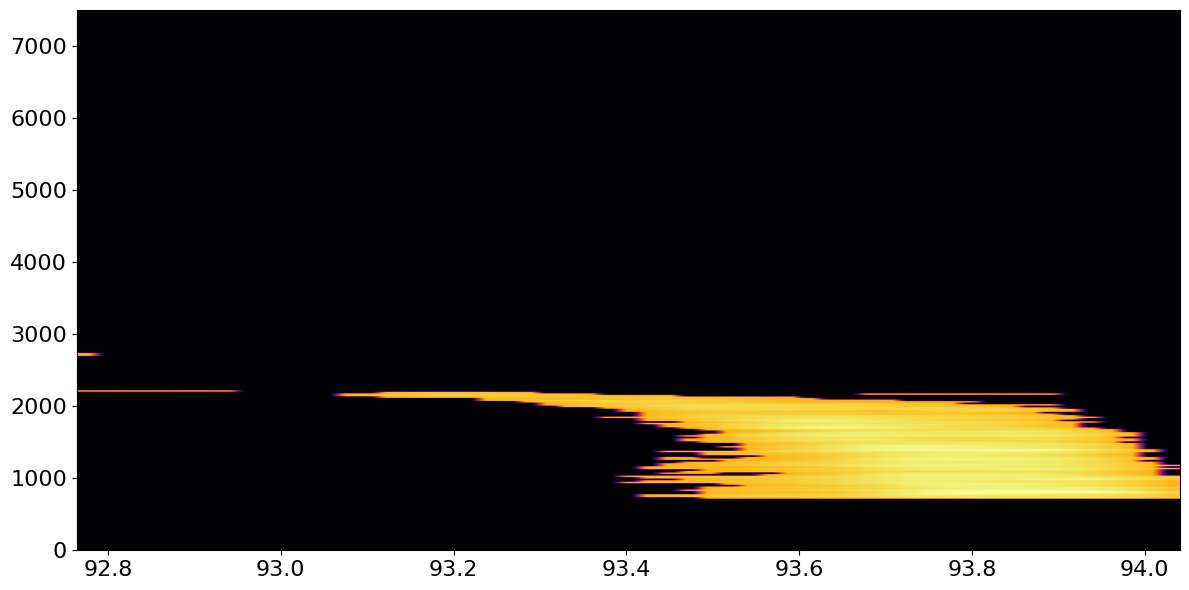

Group with 18 points >= 0 dB at times: 95.34113378684808 - 95.75909297052154
max speed =  54.58353136882129


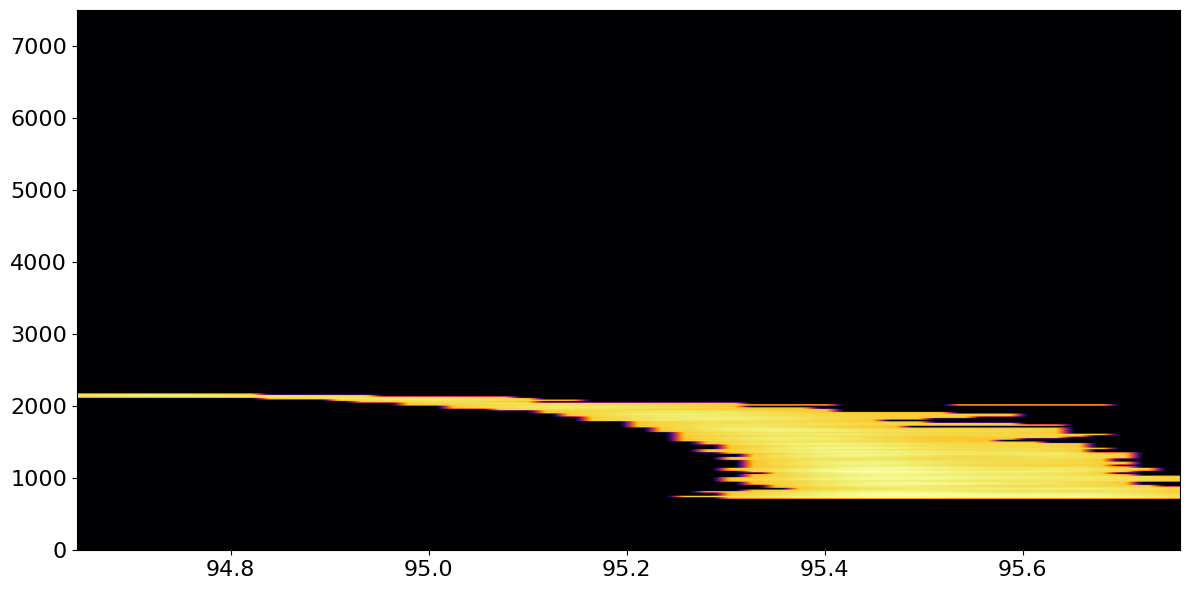

Group with 22 points >= 0 dB at times: 99.98512471655329 - 100.49596371882086
max speed =  58.404378564638776


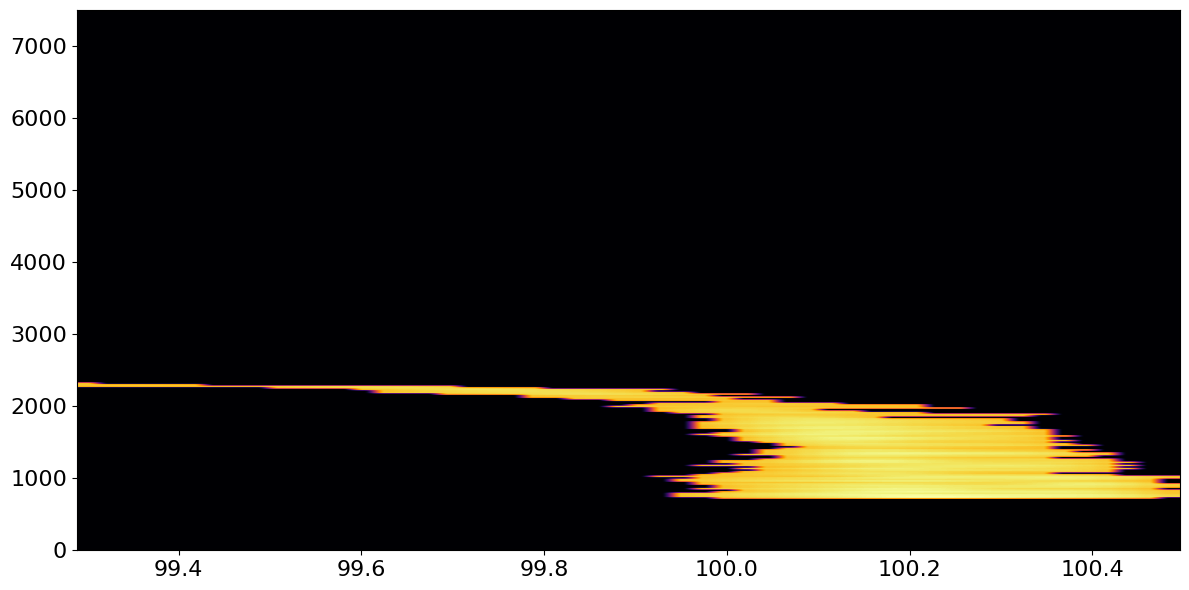

Group with 12 points >= 0 dB at times: 110.3180045351474 - 110.5966439909297
max speed =  57.85854325095057


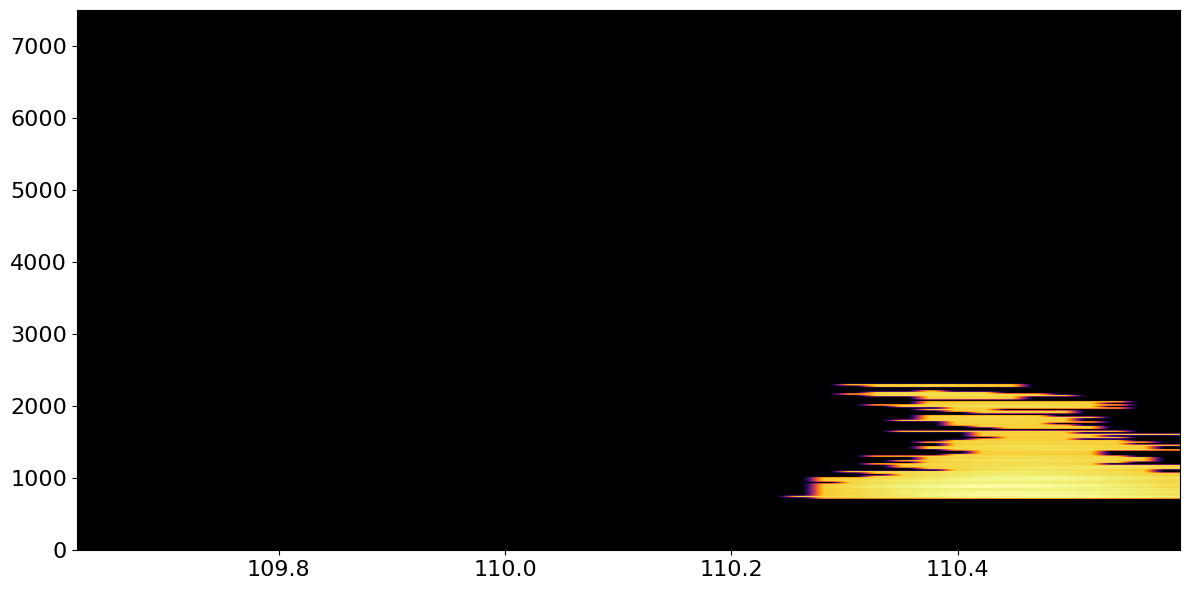

Group with 28 points >= 0 dB at times: 124.203537414966 - 124.85369614512472
max speed =  40.937648526615966


KeyboardInterrupt: 

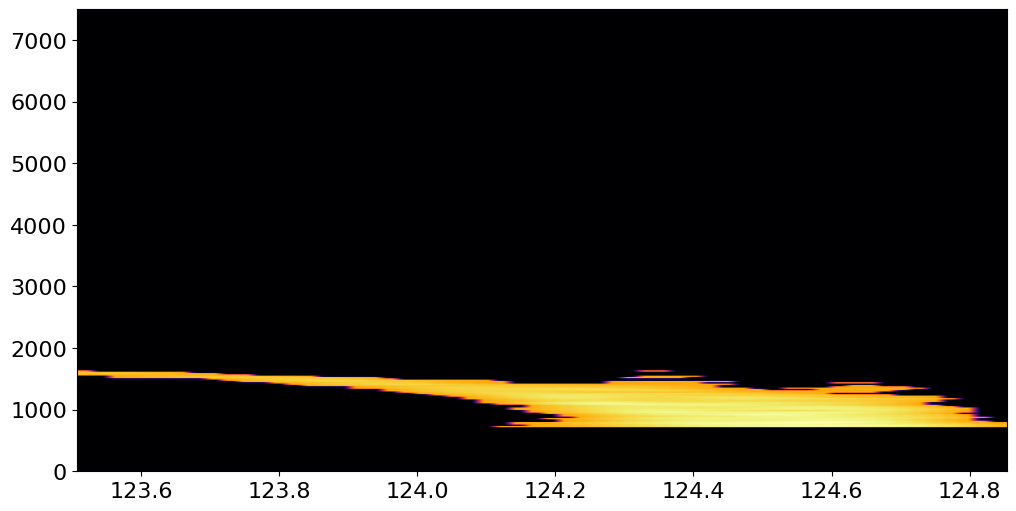

In [16]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Apply Gaussian smoothing
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Apply thresholding
threshold_db = -3  # Threshold in dB
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, -80)

# Set all frequencies below 200 Hz and above 7000 Hz to -80 dB
lower_freq_limit = 700
upper_freq_limit = 7000

# Find the frequency indices corresponding to the limits
lower_freq_index = np.argmin(np.abs(frequencies - lower_freq_limit))
upper_freq_index = np.argmin(np.abs(frequencies - upper_freq_limit))

# Set the values outside the frequency limits to -80 dB
Sxx_thresholded[:lower_freq_index, :] = -80
Sxx_thresholded[upper_freq_index:, :] = -80

# Find the frequency index corresponding to the target frequency (750 Hz)
target_frequency = 750  # Hz
freq_index = np.argmin(np.abs(frequencies - target_frequency))

# Define the minimum group size and the power threshold
min_group_size = 10
power_threshold = 0  # dB

# Initialize variables to keep track of the group
group_start_time = None
group_size = 0

i = 0
# Loop through the spectrogram at the specified frequency
for t in range(Sxx_thresholded.shape[1]):
    if Sxx_thresholded[freq_index, t] >= power_threshold:
        if group_start_time is None:
            group_start_time = t
            group_size = 1
        else:
            if t == group_start_time + group_size:
                group_size += 1
            else:
                if group_size >= min_group_size:
                    # Print the time range of the group
                    start_time = times[group_start_time]
                    end_time = times[group_start_time + group_size]
                    print(f"Group with {group_size} points >= {power_threshold} dB at times: {start_time} - {end_time}")

                    # Plot the full spectrogram for this group
                    group_start_index = group_start_time - 30
                    group_end_index = group_start_time + group_size
                    group_spectrogram = Sxx_thresholded[:, group_start_index:group_end_index]

                    # Find the indices of non-zero elements
                    nonzero_indices = np.argwhere(group_spectrogram != -80)

                    if len(nonzero_indices) > 0:
                        # Find the maximum indices for non-zero elements
                        max_indices = np.max(nonzero_indices, axis=0)
                        
                        #print("Largest indices of non-zero values:", tuple(max_indices))
                        print("max speed = ", frequencies[max_indices[0]]/39.45)
                    else:
                        print("No non-zero values found in the array.")
                    
            

                    plt.figure(figsize=(12, 6))
                    plt.ylim(0, 7500)
                    plt.imshow(group_spectrogram, aspect='auto', cmap='inferno',
                               origin='lower', extent=[times[group_start_index], times[group_end_index], frequencies.min(), frequencies.max()])
                    #plt.colorbar(label='dB')
                    #plt.xlabel('Time (s)')
                    #plt.ylabel('Frequency (Hz)')
                    plt.xticks(fontsize=16)  # Set x-axis tick label fontsize
                    plt.yticks(fontsize=16)  # Set y-axis tick label fontsize
                    plt.savefig('Test1SpectrogramIsolated.pdf', format = 'pdf', bbox_inches='tight')
                    plt.tight_layout()
                    plt.show()

                    i = i + 1

                group_start_time = t
                group_size = 1

# Check if the last group meets the minimum size requirement
if group_size >= min_group_size:
    start_time = times[group_start_time]
    end_time = times[group_start_time + group_size]
    print(f"Group with {group_size} points >= {power_threshold} dB at times: {start_time} - {end_time}")

    # Plot the full spectrogram for the last group
    group_start_index = group_start_time - 25
    group_end_index = group_start_time + group_size
    group_spectrogram = Sxx_thresholded[:, group_start_index:group_end_index]

    # Find the indices of non-zero elements
    nonzero_indices = np.argwhere(group_spectrogram != -80)

    if len(nonzero_indices) > 0:
        # Find the maximum indices for non-zero elements
        max_indices = np.max(nonzero_indices, axis=0)
                        
        #print("Largest indices of non-zero values:", tuple(max_indices))
        print("max speed = ", frequencies[max_indices[0]]/39.45)
    else:
        print("No non-zero values found in the array.")
    
    plt.figure(figsize=(12, 6))
    plt.ylim(0, 7500)
    plt.imshow(group_spectrogram, aspect='auto', cmap='inferno',
               origin='lower', extent=[times[group_start_index], times[group_end_index], frequencies.min(), frequencies.max()])
    plt.colorbar(label='dB')
    #plt.title(f'Spectrogram for Last Group (Threshold > {power_threshold} dB)')
    #plt.xlabel('Time (s)')
    #plt.ylabel('Frequency (Hz)')
    plt.xticks(fontsize=16)  # Set x-axis tick label fontsize
    plt.yticks(fontsize=16)  # Set y-axis tick label fontsize
    plt.tight_layout()
    plt.show()


### Figure 7.5

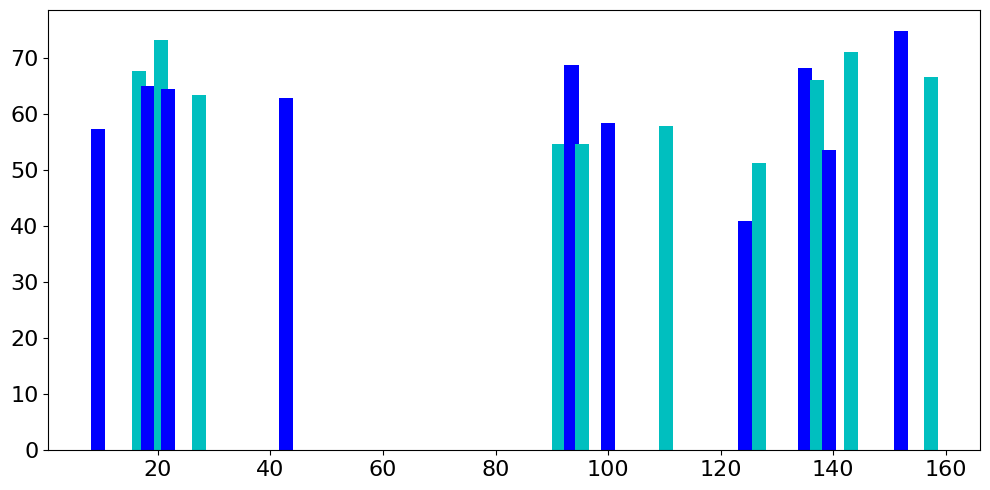

In [17]:
# Data from the table
target_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
detection_times = [9.3, 16.7, 18.3, 20.5, 21.8, 27.3, 42.7, 91.2, 93.5, 95.3, 100.0, 110.3, 124.3, 126.8, 135.0, 137.1, 139.2, 143.2, 152.1, 157.3]
target_speeds = [57.3, 67.7, 65.0, 73.14, 64.4, 63.3, 62.8, 54.6, 68.8, 54.6, 58.4, 57.9, 40.9, 51.3, 68.2, 66.0, 53.5, 71.0, 74.8, 66.6]

# Create a bar graph with rotated x-axis labels and alternating bar colors
plt.figure(figsize=(10, 5))
bars = plt.bar(detection_times, target_speeds, width=2.5, color=['b', 'c'] * 10)  # Alternating blue (b) and cyan (c)

# Rotate the x-axis labels for better readability
plt.xticks()  # Rotate 45 degrees and align to the right

#plt.xlabel('Time (s)', fontsize = '20')
#plt.ylabel('Velocity (km/h)', fontsize = '20')
plt.xticks(fontsize=16)  # Set x-axis tick label fontsize
plt.yticks(fontsize=16)  # Set y-axis tick label fontsize
plt.tight_layout()
plt.savefig('Setup1Test1BarGraph.pdf', format = 'pdf')
plt.show()

### Figure 7.6

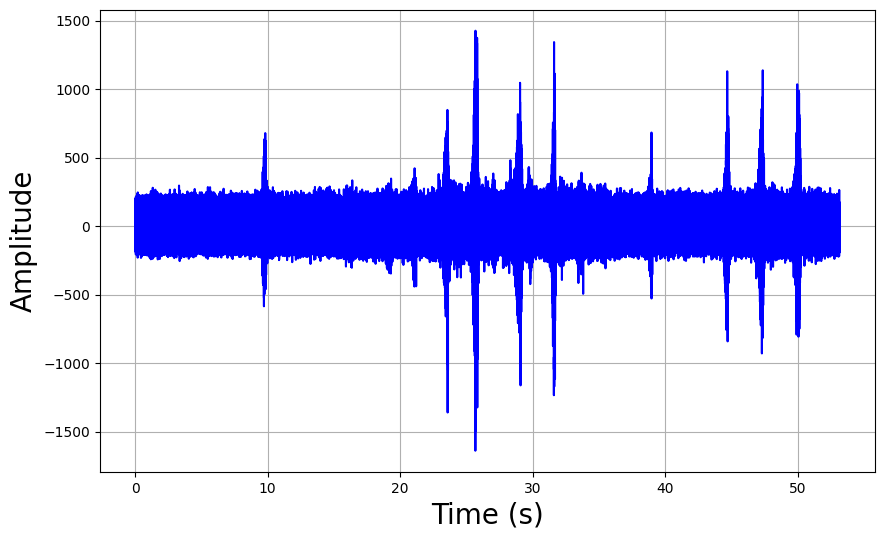

In [ ]:
# Replace 'your_wav_file.wav' with the path to your WAV file
wav_file = 'Data/openTest3.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

# Calculate the time values for the x-axis
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the voltage-time graph
plt.figure(figsize=(10, 6))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Amplitude', fontsize = '20')
#plt.title('Voltage-Time Plot')
plt.grid(True)
plt.savefig('Test2TimeDomain.pdf', format = 'pdf')
plt.show()

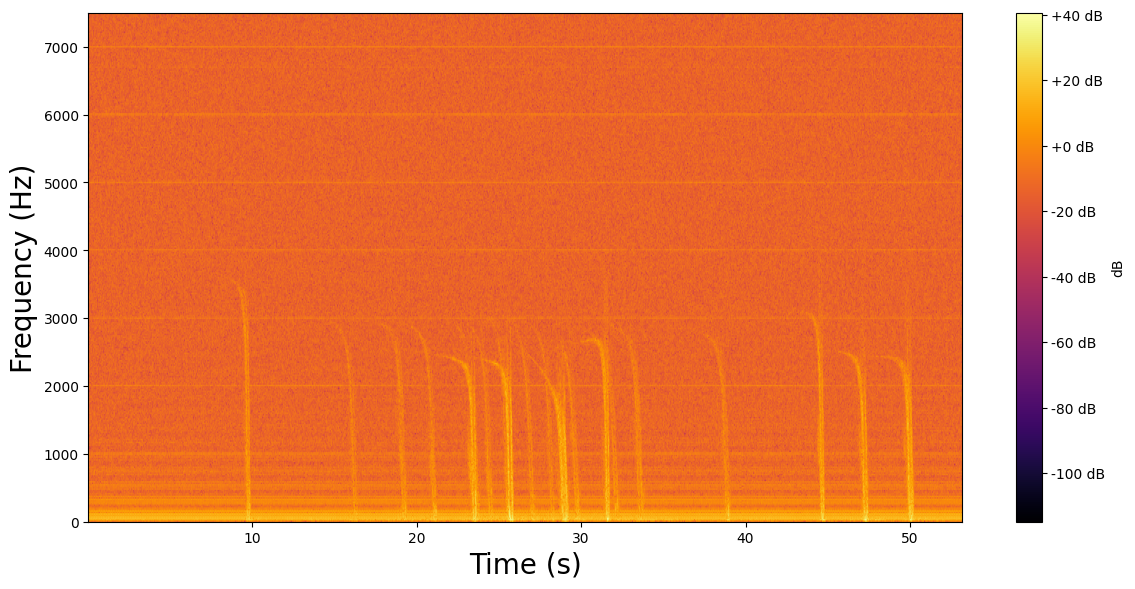

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Change the colormap for better contrast
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)

# Adjust the color scale for dynamic range
plt.colorbar(label='dB', format='%+2.0f dB')

plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Test2Spectrogram.pdf', format = 'pdf')
plt.show()

### Figure 7.6

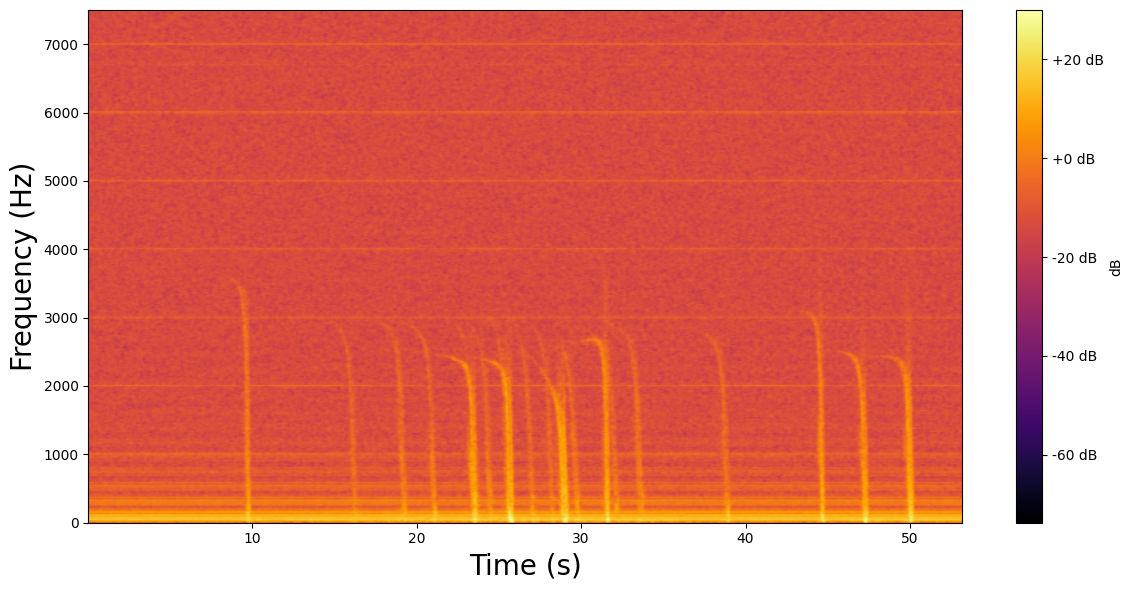

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Change the colormap for better contrast
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_smoothed, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)

# Adjust the color scale for dynamic range
plt.colorbar(label='dB', format='%+2.0f dB')
#plt.clim(vmin=-60, vmax=0)

plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Test2SpectrogramAfterSmoothing.pdf', format = 'pdf')
plt.show()

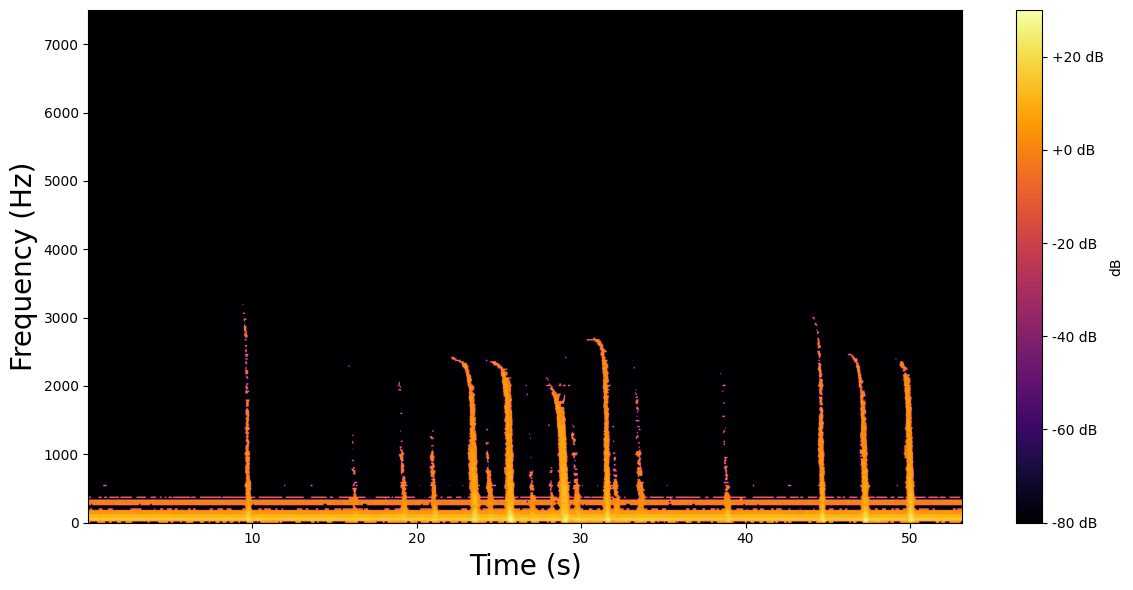

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Apply thresholding
threshold_db = -3  # Threshold in dB
min_db = -80  # Minimum value for frequencies below the threshold
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, min_db)

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.ylim(0, 7500)
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB', format='%+2.0f dB')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Test2SpectrogramAfterThresholding.pdf', format = 'pdf')
plt.show()

### Figure 7.8

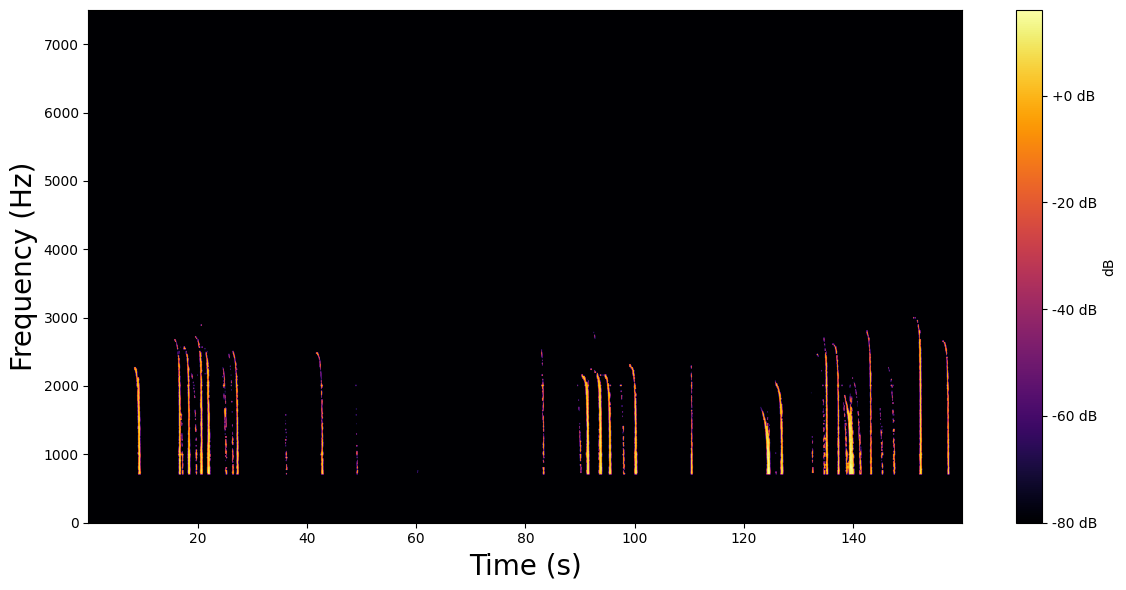

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Apply thresholding
threshold_db = -3  # Threshold in dB
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, -80)

# Set all frequencies below 200 Hz and above 7000 Hz to -80 dB
lower_freq_limit = 700
upper_freq_limit = 7000

# Find the frequency indices corresponding to the limits
lower_freq_index = np.argmin(np.abs(frequencies - lower_freq_limit))
upper_freq_index = np.argmin(np.abs(frequencies - upper_freq_limit))

# Set the values outside the frequency limits to -80 dB
Sxx_thresholded[:lower_freq_index, :] = -80
Sxx_thresholded[upper_freq_index:, :] = -80

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.ylim(0, 7500)
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB', format='%+2.0f dB')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Test2SpectrogramAfterRemovingFrequencies.pdf', format = 'pdf')
plt.show()

### Figure 7.9

Group with 17 points >= 0 dB at times: 23.2431746031746 - 23.637913832199548
max speed =  60.041884505703415


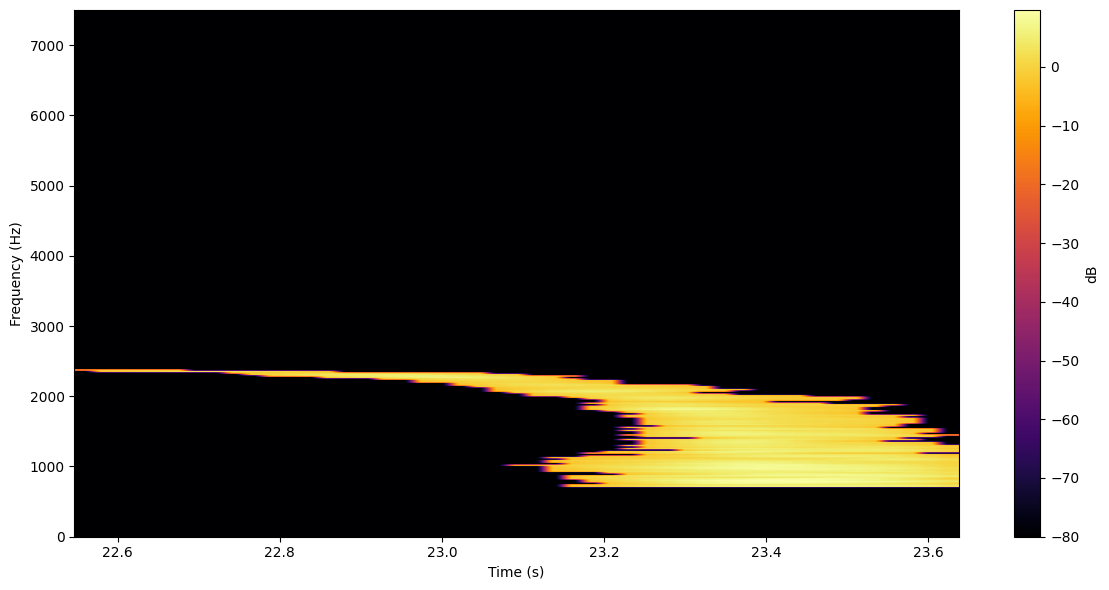

Group with 21 points >= 0 dB at times: 25.402630385487527 - 25.890249433106575
max speed =  59.49604919201521


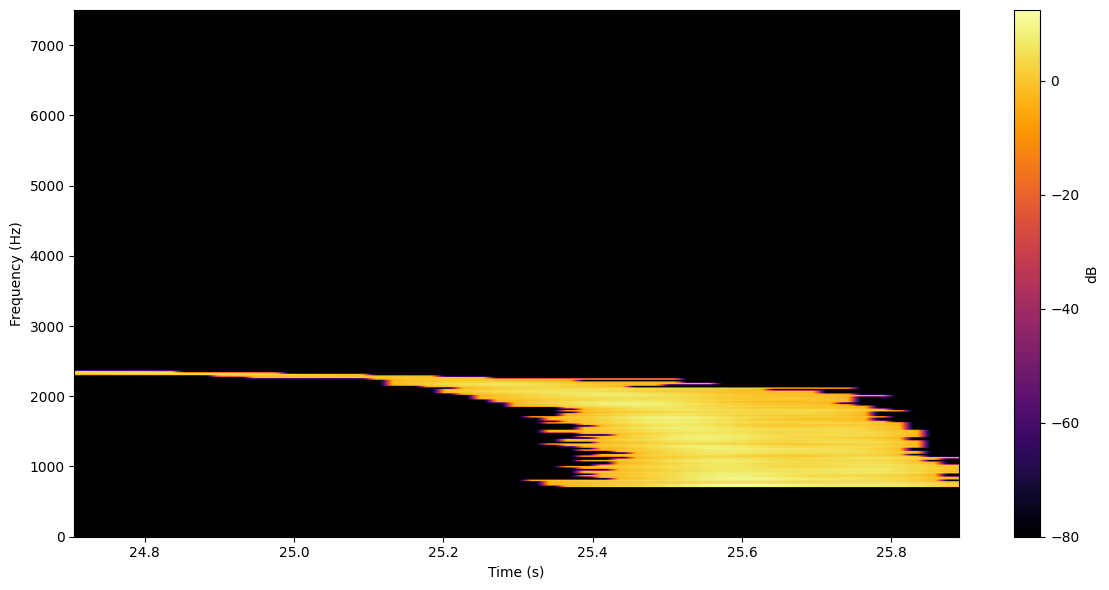

Group with 21 points >= 0 dB at times: 28.69986394557823 - 29.18748299319728
max speed =  61.133555133079845


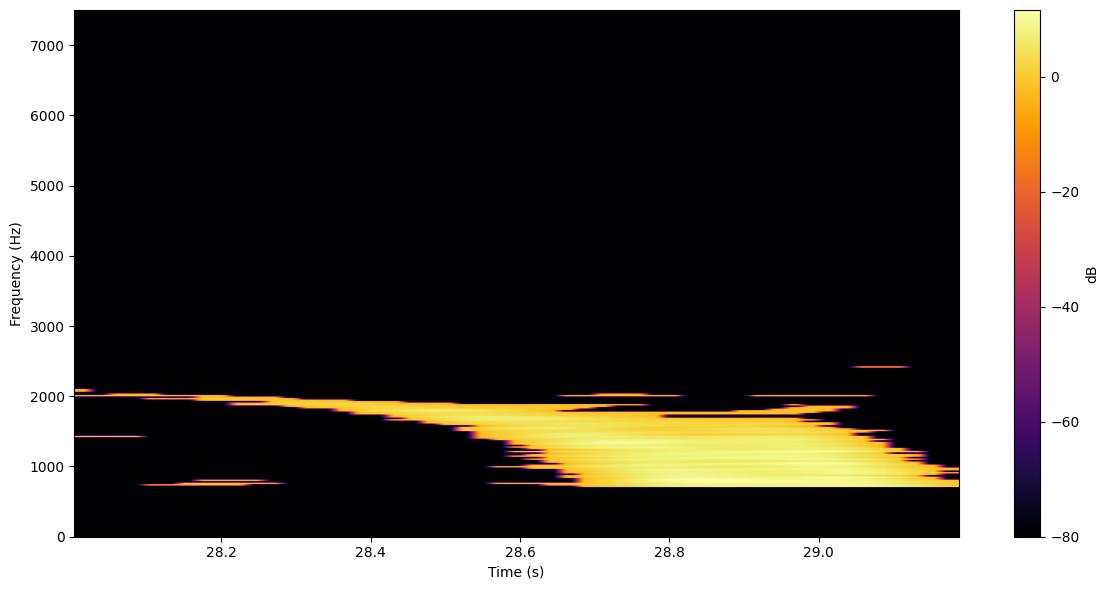

Group with 14 points >= 0 dB at times: 31.41659863945578 - 31.741678004535146
max speed =  68.22941421102661


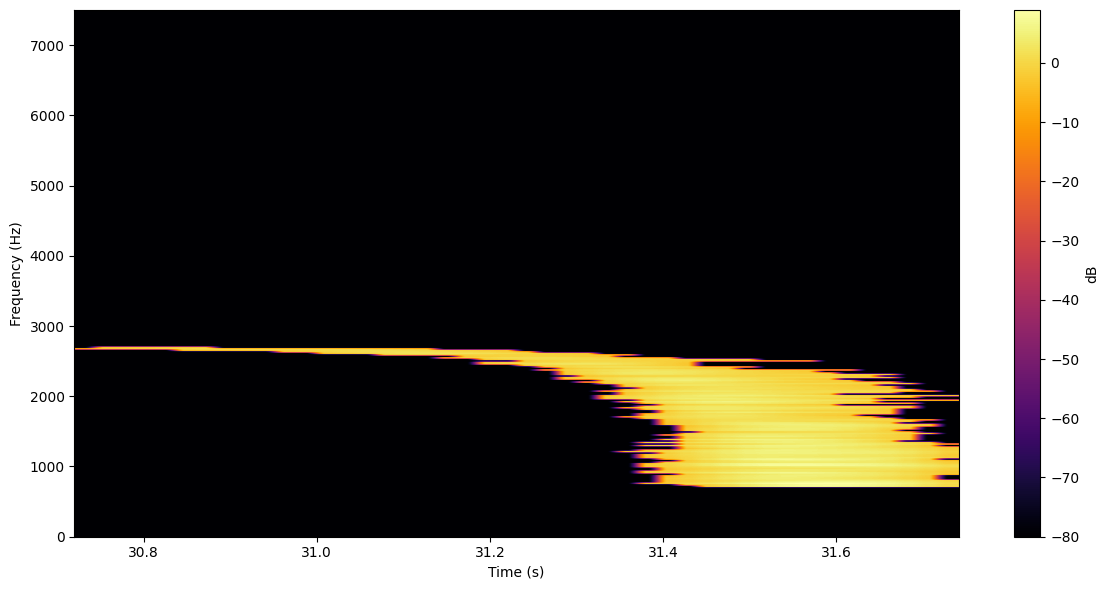

Group with 11 points >= 0 dB at times: 44.535873015873015 - 44.7912925170068
max speed =  75.8711086026616


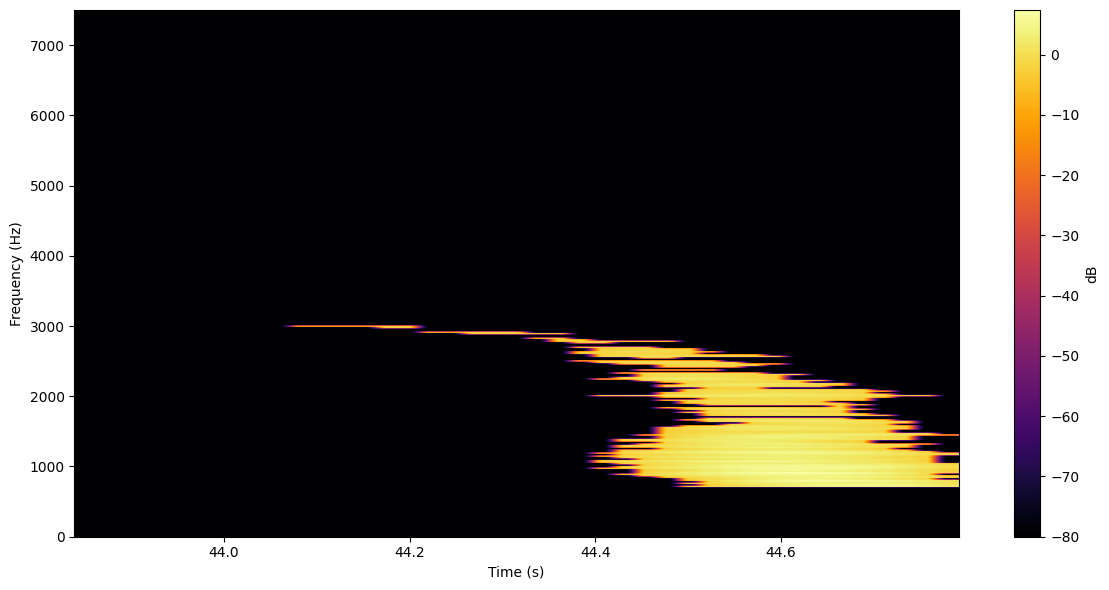

Group with 15 points >= 0 dB at times: 47.09006802721088 - 47.438367346938776
max speed =  62.22522576045627


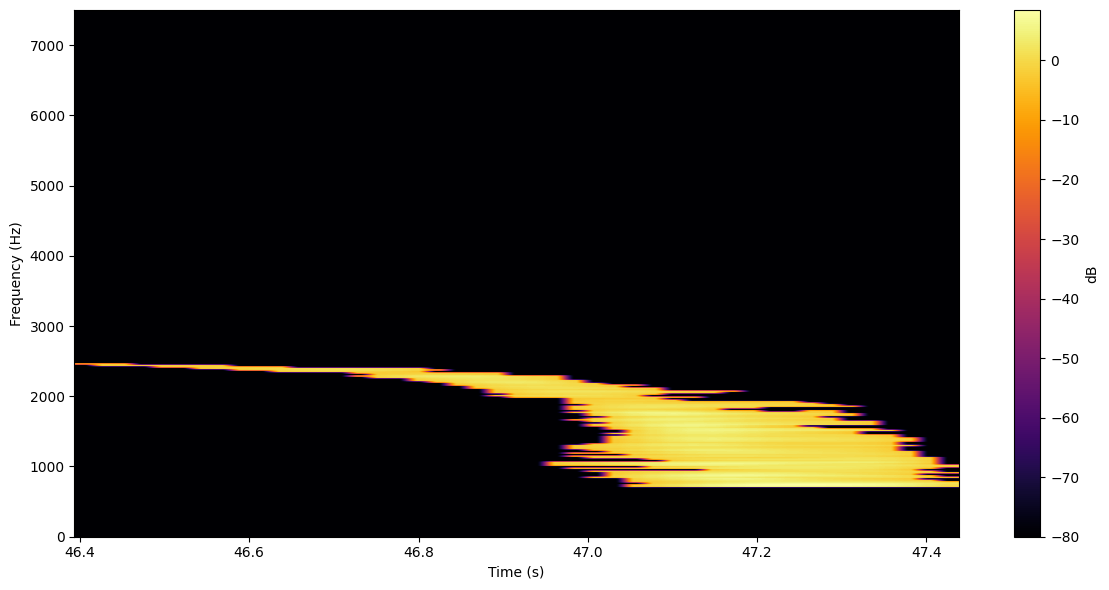

Group with 18 points >= 0 dB at times: 49.80680272108844 - 50.224761904761905
max speed =  59.49604919201521


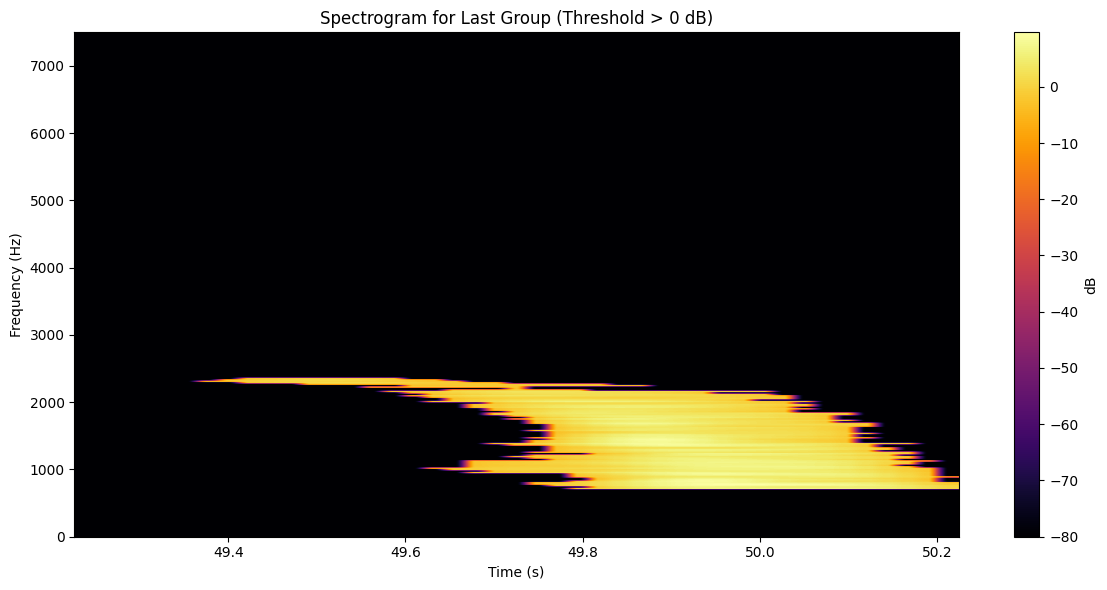

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Apply Gaussian smoothing
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Apply thresholding
threshold_db = -3  # Threshold in dB
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, -80)

# Set all frequencies below 200 Hz and above 7000 Hz to -80 dB
lower_freq_limit = 700
upper_freq_limit = 7000

# Find the frequency indices corresponding to the limits
lower_freq_index = np.argmin(np.abs(frequencies - lower_freq_limit))
upper_freq_index = np.argmin(np.abs(frequencies - upper_freq_limit))

# Set the values outside the frequency limits to -80 dB
Sxx_thresholded[:lower_freq_index, :] = -80
Sxx_thresholded[upper_freq_index:, :] = -80

# Find the frequency index corresponding to the target frequency (750 Hz)
target_frequency = 750  # Hz
freq_index = np.argmin(np.abs(frequencies - target_frequency))

# Define the minimum group size and the power threshold
min_group_size = 10
power_threshold = 0  # dB

# Initialize variables to keep track of the group
group_start_time = None
group_size = 0

# Loop through the spectrogram at the specified frequency
for t in range(Sxx_thresholded.shape[1]):
    if Sxx_thresholded[freq_index, t] >= power_threshold:
        if group_start_time is None:
            group_start_time = t
            group_size = 1
        else:
            if t == group_start_time + group_size:
                group_size += 1
            else:
                if group_size >= min_group_size:
                    # Print the time range of the group
                    start_time = times[group_start_time]
                    end_time = times[group_start_time + group_size]
                    print(f"Group with {group_size} points >= {power_threshold} dB at times: {start_time} - {end_time}")

                    # Plot the full spectrogram for this group
                    group_start_index = group_start_time - 30
                    group_end_index = group_start_time + group_size
                    group_spectrogram = Sxx_thresholded[:, group_start_index:group_end_index]

                    # Find the indices of non-zero elements
                    nonzero_indices = np.argwhere(group_spectrogram != -80)

                    if len(nonzero_indices) > 0:
                        # Find the maximum indices for non-zero elements
                        max_indices = np.max(nonzero_indices, axis=0)
                        
                        #print("Largest indices of non-zero values:", tuple(max_indices))
                        print("max speed = ", frequencies[max_indices[0]]/39.45)
                    else:
                        print("No non-zero values found in the array.")
                    
            

                    plt.figure(figsize=(12, 6))
                    plt.ylim(0, 7500)
                    plt.imshow(group_spectrogram, aspect='auto', cmap='inferno',
                               origin='lower', extent=[times[group_start_index], times[group_end_index], frequencies.min(), frequencies.max()])
                    plt.colorbar(label='dB')
                    plt.xlabel('Time (s)')
                    plt.ylabel('Frequency (Hz)')
                    plt.tight_layout()
                    plt.show()

                group_start_time = t
                group_size = 1

# Check if the last group meets the minimum size requirement
if group_size >= min_group_size:
    start_time = times[group_start_time]
    end_time = times[group_start_time + group_size]
    print(f"Group with {group_size} points >= {power_threshold} dB at times: {start_time} - {end_time}")

    # Plot the full spectrogram for the last group
    group_start_index = group_start_time - 25
    group_end_index = group_start_time + group_size
    group_spectrogram = Sxx_thresholded[:, group_start_index:group_end_index]

    # Find the indices of non-zero elements
    nonzero_indices = np.argwhere(group_spectrogram != -80)

    if len(nonzero_indices) > 0:
        # Find the maximum indices for non-zero elements
        max_indices = np.max(nonzero_indices, axis=0)
                        
        #print("Largest indices of non-zero values:", tuple(max_indices))
        print("max speed = ", frequencies[max_indices[0]]/39.45)
    else:
        print("No non-zero values found in the array.")
    
    plt.figure(figsize=(12, 6))
    plt.ylim(0, 7500)
    plt.imshow(group_spectrogram, aspect='auto', cmap='inferno',
               origin='lower', extent=[times[group_start_index], times[group_end_index], frequencies.min(), frequencies.max()])
    plt.colorbar(label='dB')
    plt.title(f'Spectrogram for Last Group (Threshold > {power_threshold} dB)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()


### Figure 7.10

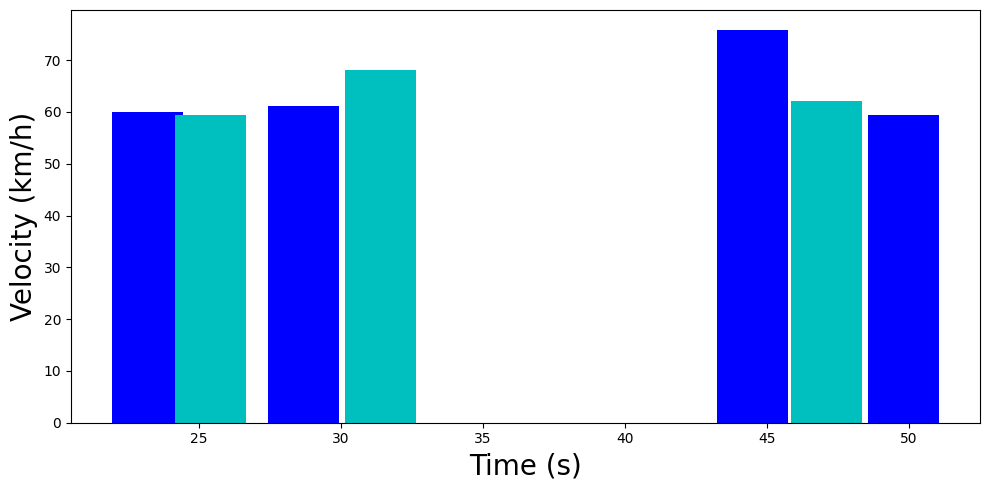

In [ ]:
# Data from the table
target_numbers = [1, 2, 3, 4, 5, 6, 7]
detection_times = [23.2, 25.4, 28.7, 31.4, 44.5, 47.1, 49.8]
target_speeds = [60.0, 59.5, 61.1, 68.2, 75.9, 62.2, 59.5]

# Create a bar graph with rotated x-axis labels and alternating bar colors
plt.figure(figsize=(10, 5))
bars = plt.bar(detection_times, target_speeds, width=2.5, color=['b', 'c'] * 10)  # Alternating blue (b) and cyan (c)

# Rotate the x-axis labels for better readability
plt.xticks()  # Rotate 45 degrees and align to the right

plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Velocity (km/h)', fontsize = '20')
plt.tight_layout()
plt.savefig('Setup1Test2BarGraph.pdf', format = 'pdf')
plt.show()

### Figure 7.11

In [ ]:
# Replace 'your_wav_file.wav' with the path to your WAV file
wav_file = 'Data/openTest.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

# Calculate the time values for the x-axis
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the voltage-time graph
plt.figure(figsize=(10, 6))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Amplitude', fontsize = '20')
#plt.title('Voltage-Time Plot')
plt.grid(True)
plt.savefig('Test3TimeDomain.pdf', format = 'pdf')
plt.show()

KeyboardInterrupt: 

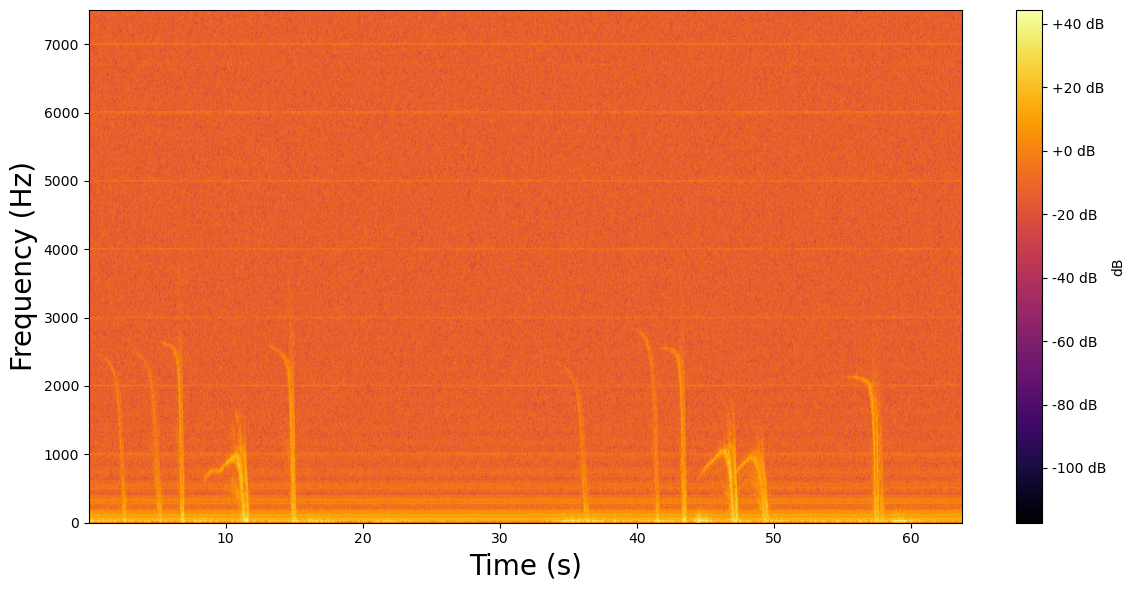

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Change the colormap for better contrast
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)

# Adjust the color scale for dynamic range
plt.colorbar(label='dB', format='%+2.0f dB')

plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Test3Spectrogram.pdf', format = 'pdf')
plt.show()

### Figure 7.12

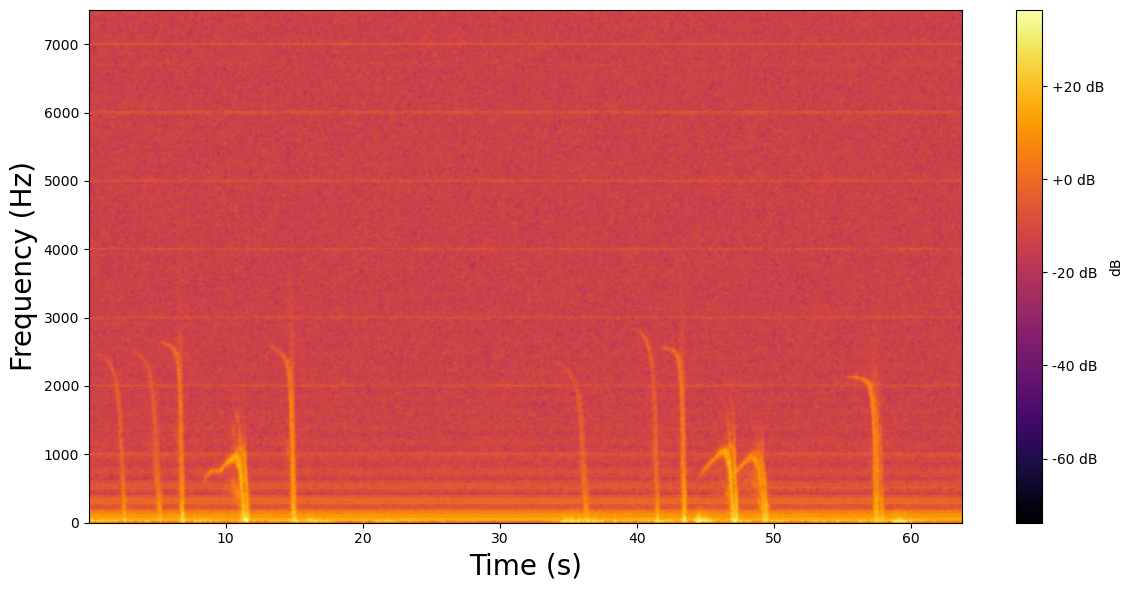

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Apply Gaussian smoothing
from scipy.ndimage import gaussian_filter
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Change the colormap for better contrast
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_smoothed, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)

# Adjust the color scale for dynamic range
plt.colorbar(label='dB', format='%+2.0f dB')
#plt.clim(vmin=-60, vmax=0)

plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Test3SpectrogramAfterSmoothing.pdf', format = 'pdf')
plt.show()

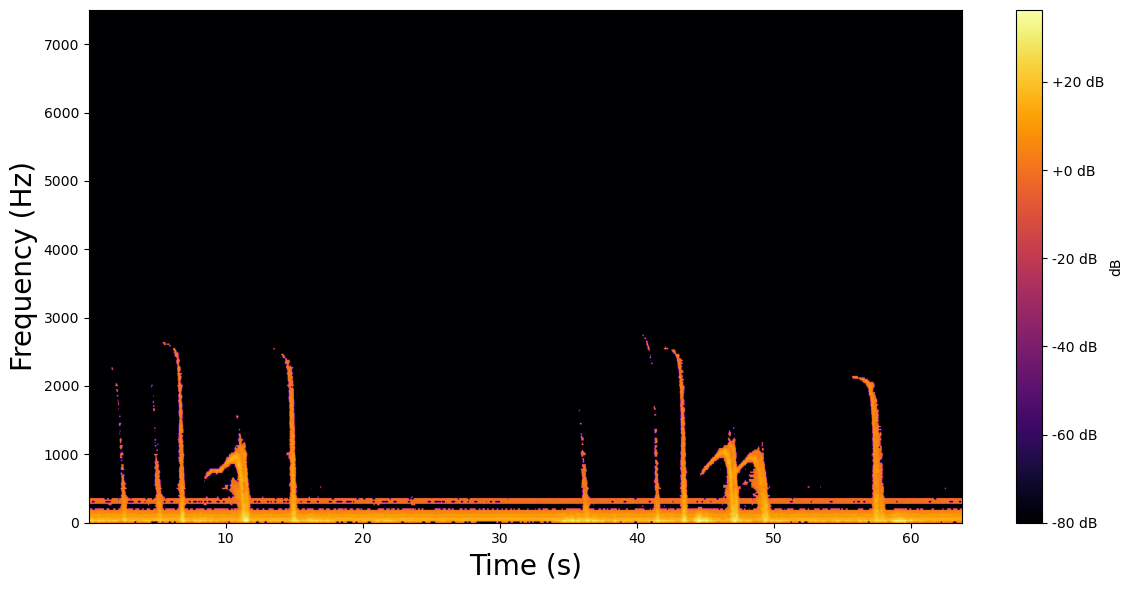

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Apply Gaussian smoothing
from scipy.ndimage import gaussian_filter
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Apply thresholding
threshold_db = -3  # Threshold in dB
min_db = -80  # Minimum value for frequencies below the threshold
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, min_db)

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.ylim(0, 7500)
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB', format='%+2.0f dB')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Test3SpectrogramAfterThresholding.pdf', format = 'pdf')
plt.show()

### Figure 7.13

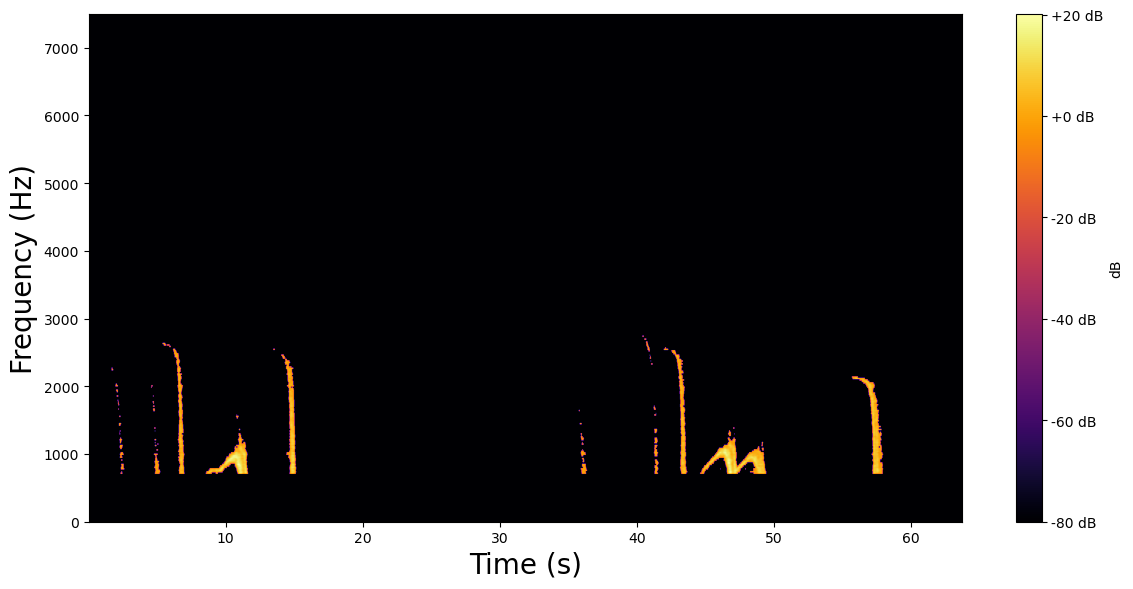

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Apply Gaussian smoothing
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Apply thresholding
threshold_db = -3  # Threshold in dB
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, -80)

# Set all frequencies below 200 Hz and above 7000 Hz to -80 dB
lower_freq_limit = 700
upper_freq_limit = 7000

# Find the frequency indices corresponding to the limits
lower_freq_index = np.argmin(np.abs(frequencies - lower_freq_limit))
upper_freq_index = np.argmin(np.abs(frequencies - upper_freq_limit))

# Set the values outside the frequency limits to -80 dB
Sxx_thresholded[:lower_freq_index, :] = -80
Sxx_thresholded[upper_freq_index:, :] = -80

# Plot the thresholded spectrogram
plt.figure(figsize=(12, 6))
plt.ylim(0, 7500)
plt.imshow(Sxx_thresholded, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='dB', format='%+2.0f dB')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Test3SpectrogramAfterRemovingFrequencies.pdf', format = 'pdf')
plt.show()

### Figure 7.14

Group with 13 points >= 0 dB at times: 6.617687074829932 - 6.919546485260771
max speed =  65.50023764258555


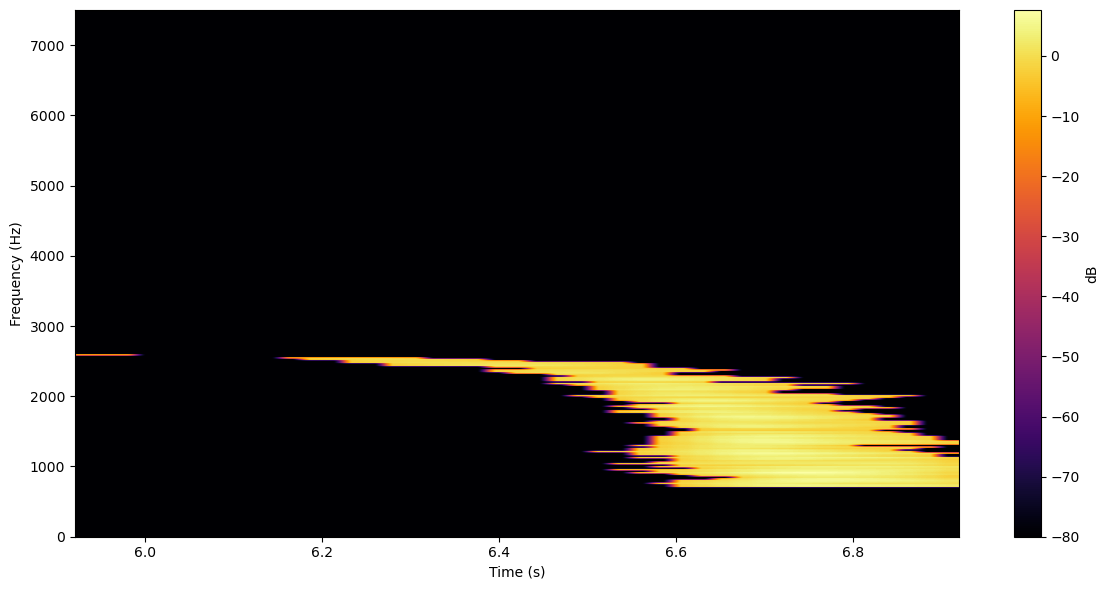

Group with 43 points >= 0 dB at times: 8.800362811791382 - 9.798820861678005
max speed =  21.287577233840302


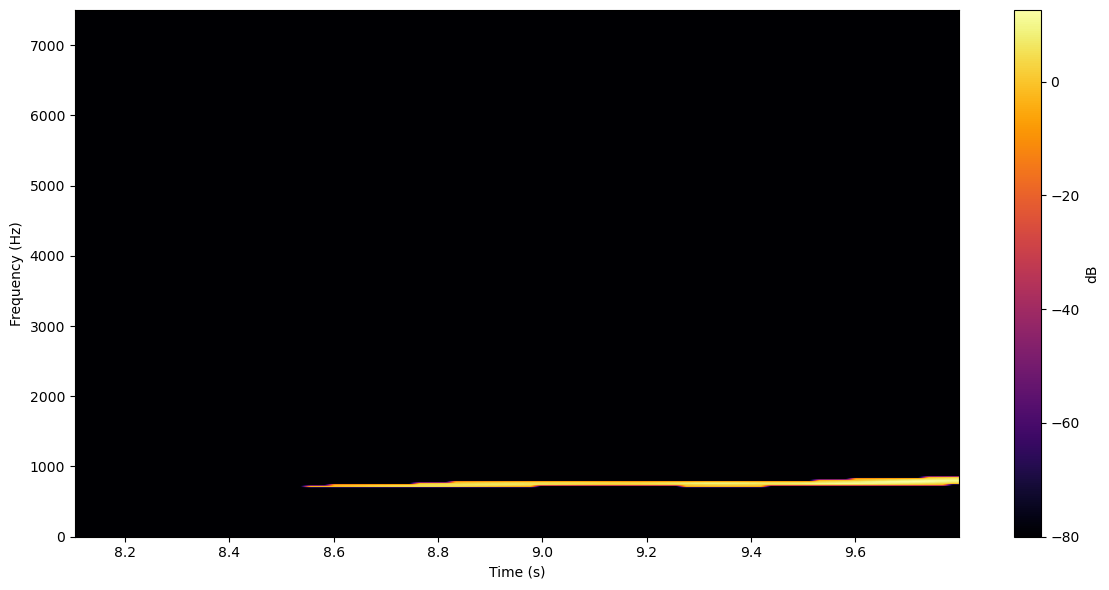

Group with 31 points >= 0 dB at times: 10.843718820861678 - 11.563537414965987
max speed =  39.84597789923954


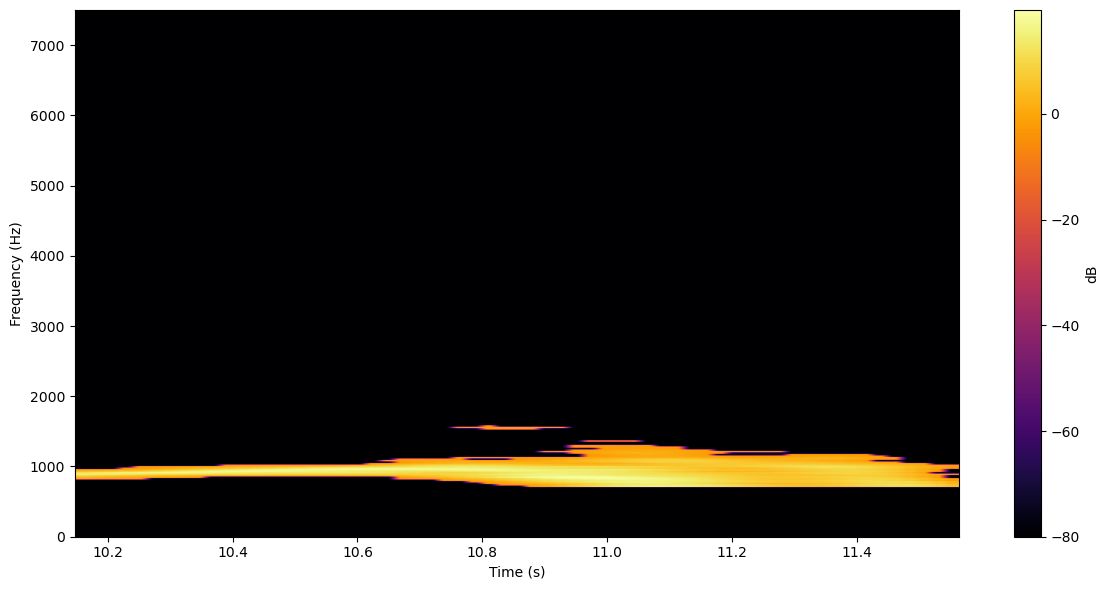

Group with 17 points >= 0 dB at times: 14.698231292517006 - 15.09297052154195
max speed =  62.22522576045627


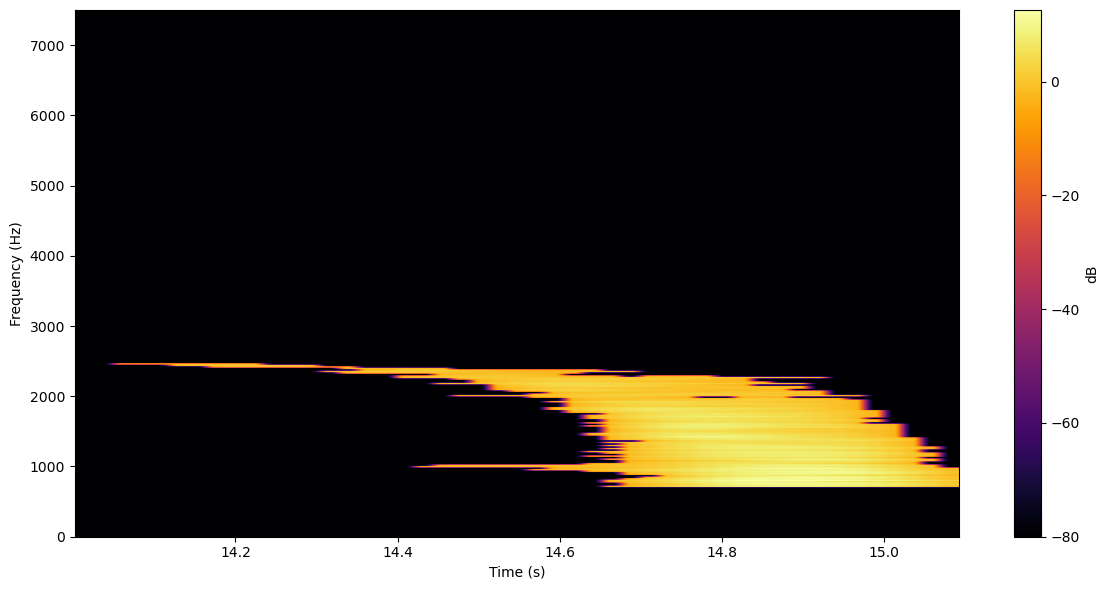

Group with 14 points >= 0 dB at times: 43.25877551020408 - 43.58385487528345
max speed =  63.86273170152091


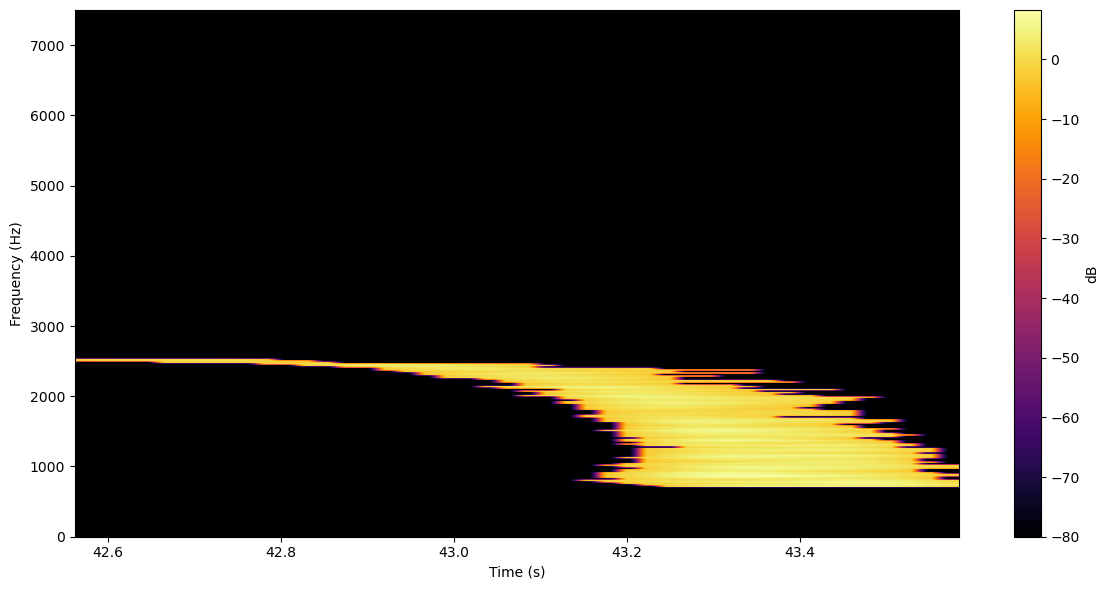

Group with 38 points >= 0 dB at times: 46.602448979591834 - 47.484807256235825
max speed =  34.93346007604563


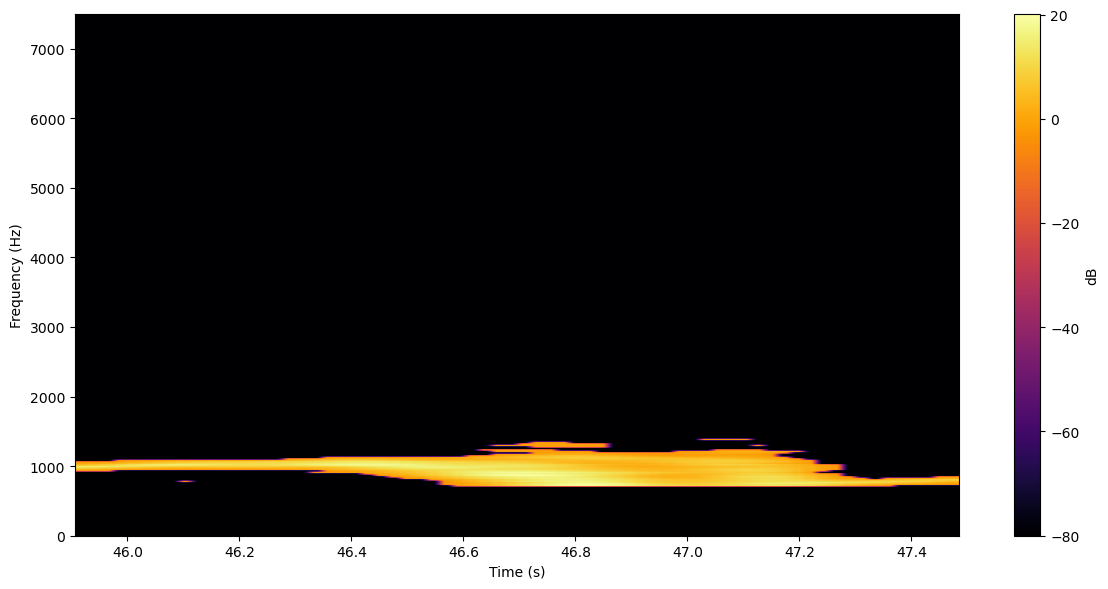

Group with 27 points >= 0 dB at times: 48.71546485260771 - 49.342403628117914
max speed =  29.475106939163496


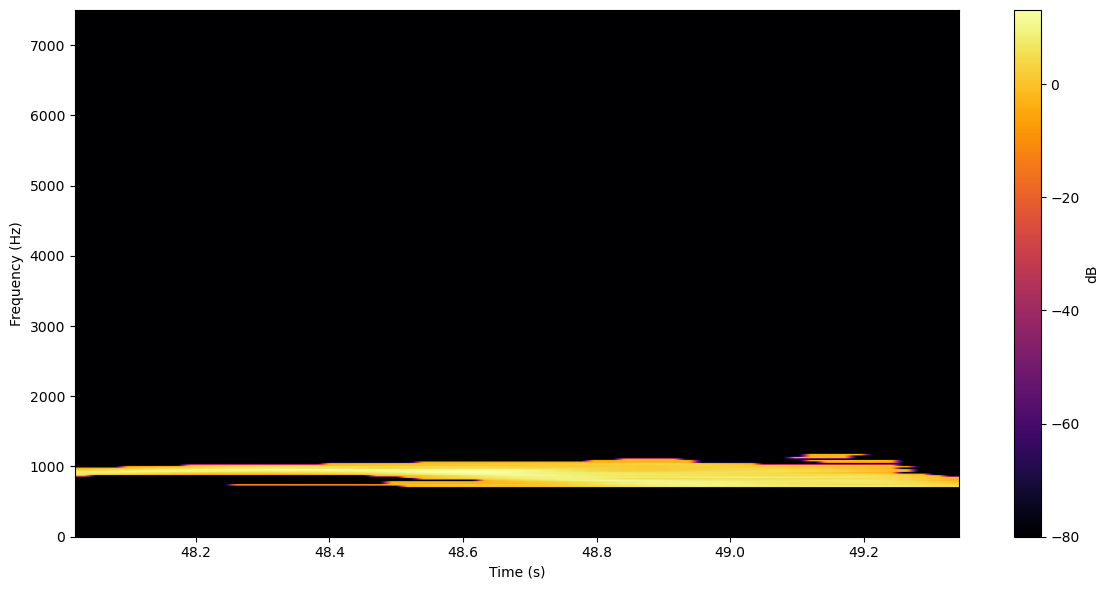

Group with 27 points >= 0 dB at times: 57.213968253968254 - 57.84090702947846
max speed =  52.94602542775665


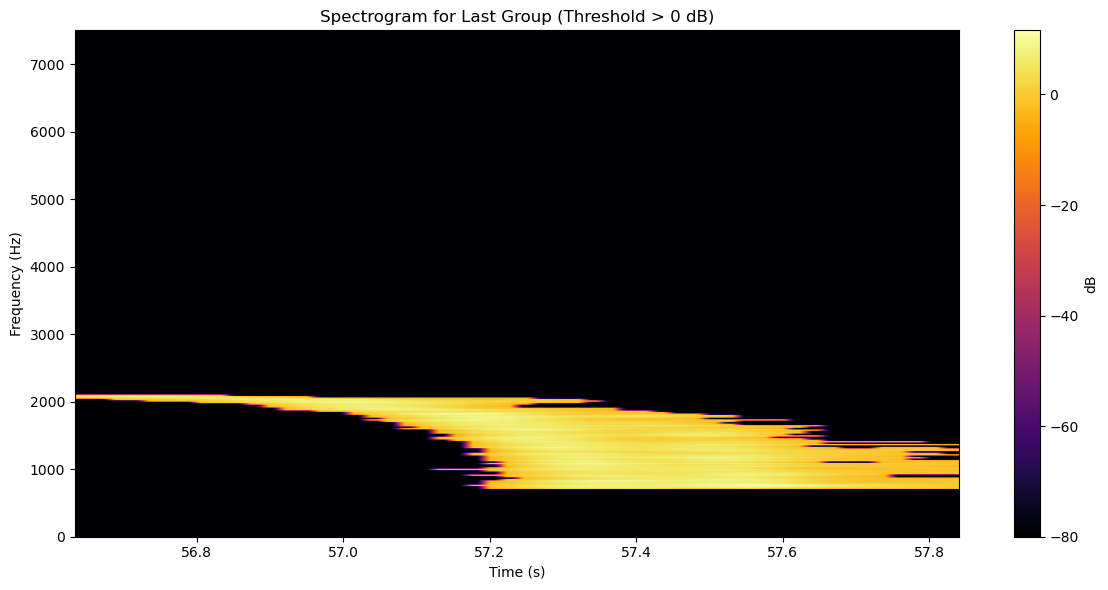

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Apply Gaussian smoothing
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 3))

# Apply thresholding
threshold_db = -3  # Threshold in dB
Sxx_thresholded = np.where(Sxx_smoothed >= threshold_db, Sxx_smoothed, -80)

# Set all frequencies below 200 Hz and above 7000 Hz to -80 dB
lower_freq_limit = 700
upper_freq_limit = 7000

# Find the frequency indices corresponding to the limits
lower_freq_index = np.argmin(np.abs(frequencies - lower_freq_limit))
upper_freq_index = np.argmin(np.abs(frequencies - upper_freq_limit))

# Set the values outside the frequency limits to -80 dB
Sxx_thresholded[:lower_freq_index, :] = -80
Sxx_thresholded[upper_freq_index:, :] = -80

# Find the frequency index corresponding to the target frequency (750 Hz)
target_frequency = 750  # Hz
freq_index = np.argmin(np.abs(frequencies - target_frequency))

# Define the minimum group size and the power threshold
min_group_size = 10
power_threshold = 0  # dB

# Initialize variables to keep track of the group
group_start_time = None
group_size = 0

# Loop through the spectrogram at the specified frequency
for t in range(Sxx_thresholded.shape[1]):
    if Sxx_thresholded[freq_index, t] >= power_threshold:
        if group_start_time is None:
            group_start_time = t
            group_size = 1
        else:
            if t == group_start_time + group_size:
                group_size += 1
            else:
                if group_size >= min_group_size:
                    # Print the time range of the group
                    start_time = times[group_start_time]
                    end_time = times[group_start_time + group_size]
                    print(f"Group with {group_size} points >= {power_threshold} dB at times: {start_time} - {end_time}")

                    # Plot the full spectrogram for this group
                    group_start_index = group_start_time - 30
                    group_end_index = group_start_time + group_size
                    group_spectrogram = Sxx_thresholded[:, group_start_index:group_end_index]

                    # Find the indices of non-zero elements
                    nonzero_indices = np.argwhere(group_spectrogram != -80)

                    if len(nonzero_indices) > 0:
                        # Find the maximum indices for non-zero elements
                        max_indices = np.max(nonzero_indices, axis=0)
                        
                        #print("Largest indices of non-zero values:", tuple(max_indices))
                        print("max speed = ", frequencies[max_indices[0]]/39.45)
                    else:
                        print("No non-zero values found in the array.")
                    
            

                    plt.figure(figsize=(12, 6))
                    plt.ylim(0, 7500)
                    plt.imshow(group_spectrogram, aspect='auto', cmap='inferno',
                               origin='lower', extent=[times[group_start_index], times[group_end_index], frequencies.min(), frequencies.max()])
                    plt.colorbar(label='dB')
                    plt.xlabel('Time (s)')
                    plt.ylabel('Frequency (Hz)')
                    plt.tight_layout()
                    plt.show()

                group_start_time = t
                group_size = 1

# Check if the last group meets the minimum size requirement
if group_size >= min_group_size:
    start_time = times[group_start_time]
    end_time = times[group_start_time + group_size]
    print(f"Group with {group_size} points >= {power_threshold} dB at times: {start_time} - {end_time}")

    # Plot the full spectrogram for the last group
    group_start_index = group_start_time - 25
    group_end_index = group_start_time + group_size
    group_spectrogram = Sxx_thresholded[:, group_start_index:group_end_index]

    # Find the indices of non-zero elements
    nonzero_indices = np.argwhere(group_spectrogram != -80)

    if len(nonzero_indices) > 0:
        # Find the maximum indices for non-zero elements
        max_indices = np.max(nonzero_indices, axis=0)
                        
        #print("Largest indices of non-zero values:", tuple(max_indices))
        print("max speed = ", frequencies[max_indices[0]]/39.45)
    else:
        print("No non-zero values found in the array.")
    
    plt.figure(figsize=(12, 6))
    plt.ylim(0, 7500)
    plt.imshow(group_spectrogram, aspect='auto', cmap='inferno',
               origin='lower', extent=[times[group_start_index], times[group_end_index], frequencies.min(), frequencies.max()])
    plt.colorbar(label='dB')
    plt.title(f'Spectrogram for Last Group (Threshold > {power_threshold} dB)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()


### Figure 7.15

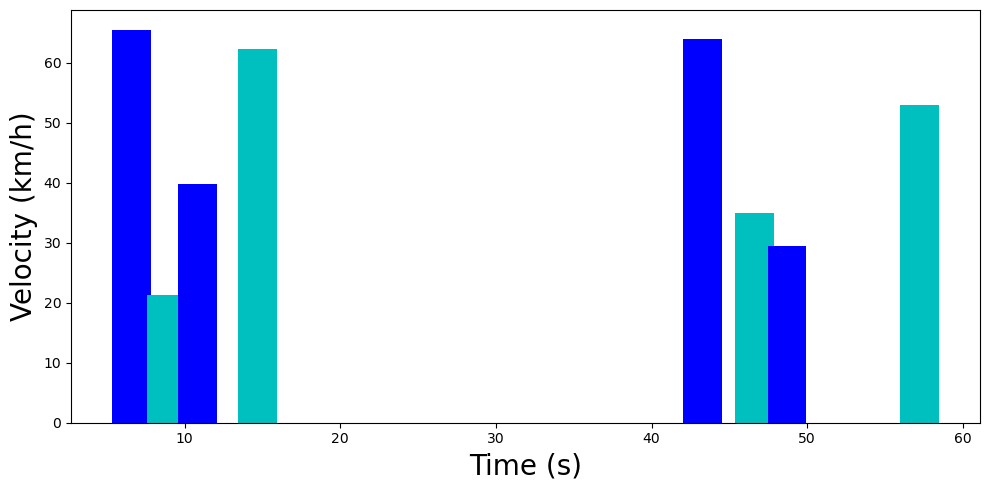

In [ ]:
# Data from the table
target_numbers = [1, 2, 3, 4, 5, 6, 7, 8]
detection_times = [6.6, 8.8, 10.8, 14.7, 43.3, 46.6, 48.7, 57.2]
target_speeds = [65.5, 21.3, 39.8, 62.2, 63.9, 34.9, 29.5, 52.9]

# Create a bar graph with rotated x-axis labels and alternating bar colors
plt.figure(figsize=(10, 5))
bars = plt.bar(detection_times, target_speeds, width=2.5, color=['b', 'c'] * 10)  # Alternating blue (b) and cyan (c)

# Rotate the x-axis labels for better readability
plt.xticks()  # Rotate 45 degrees and align to the right

plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Velocity (km/h)', fontsize = '20')
plt.tight_layout()
plt.savefig('Setup1Test3BarGraph.pdf', format = 'pdf')
plt.show()

### Figure 7.16

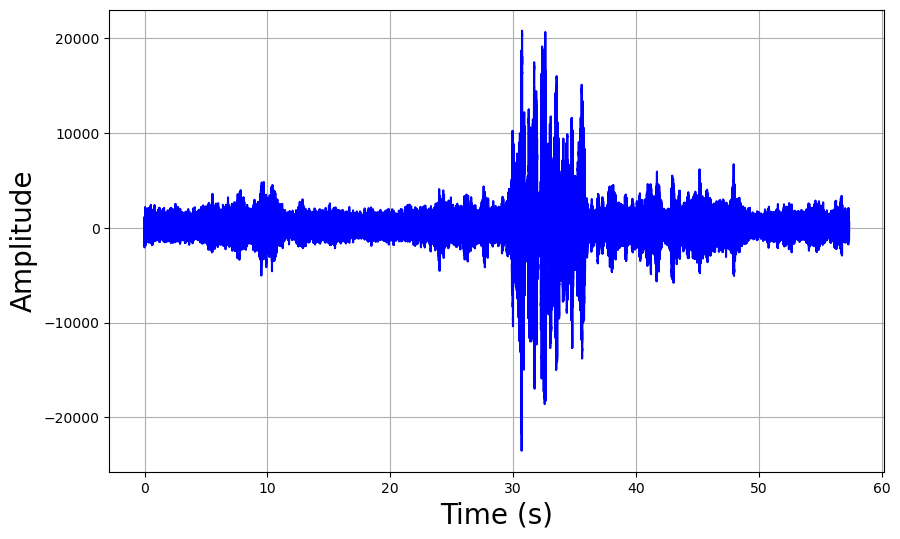

In [ ]:
# Replace 'your_wav_file.wav' with the path to your WAV file
wav_file = 'Data/LidOn_recording_20231015_120701.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

# Calculate the time values for the x-axis
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the voltage-time graph
plt.figure(figsize=(10, 6))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Amplitude', fontsize = '20')
#plt.title('Voltage-Time Plot')
plt.grid(True)
plt.savefig('Setup2LidOnTimeDomain.pdf', format = 'pdf')
plt.show()

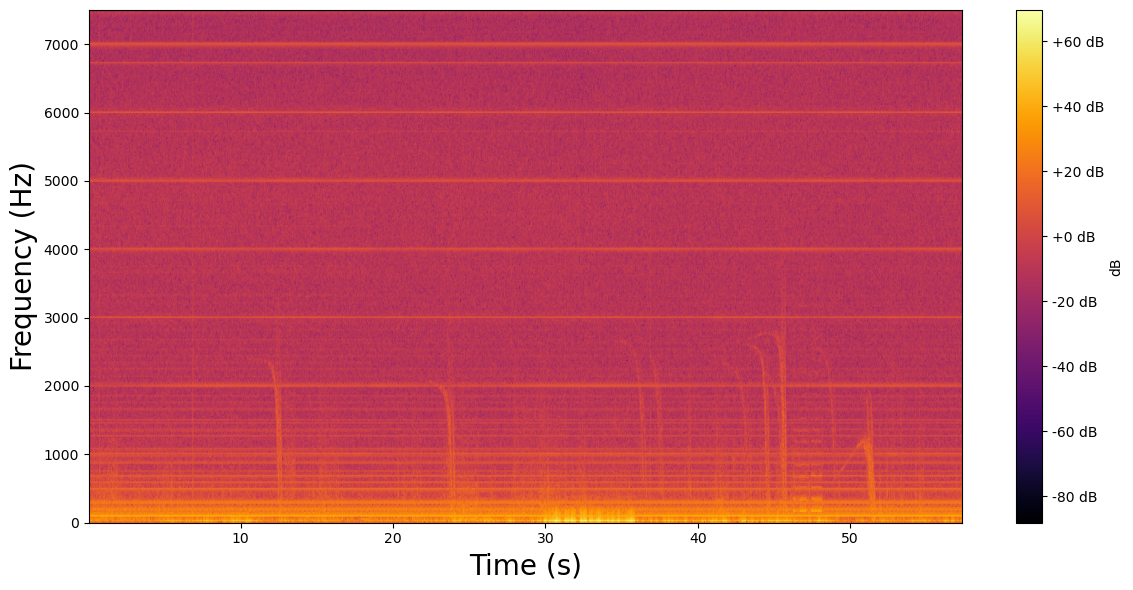

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Change the colormap for better contrast
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)

# Adjust the color scale for dynamic range
plt.colorbar(label='dB', format='%+2.0f dB')

plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Setup2LidOnSpectrogram.pdf', format = 'pdf')
plt.show()

### Figure 7.17

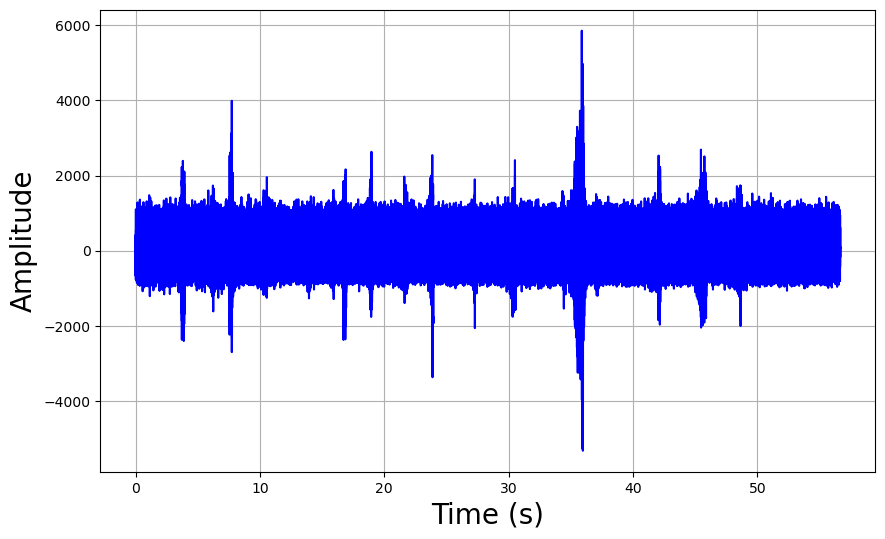

In [ ]:
# Replace 'your_wav_file.wav' with the path to your WAV file
wav_file = 'Data/LidOff_recording_20231015_121310.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

# Calculate the time values for the x-axis
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the voltage-time graph
plt.figure(figsize=(10, 6))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Amplitude', fontsize = '20')
#plt.title('Voltage-Time Plot')
plt.grid(True)
plt.savefig('Setup2LidOffTimeDomain.pdf', format = 'pdf')
plt.show()

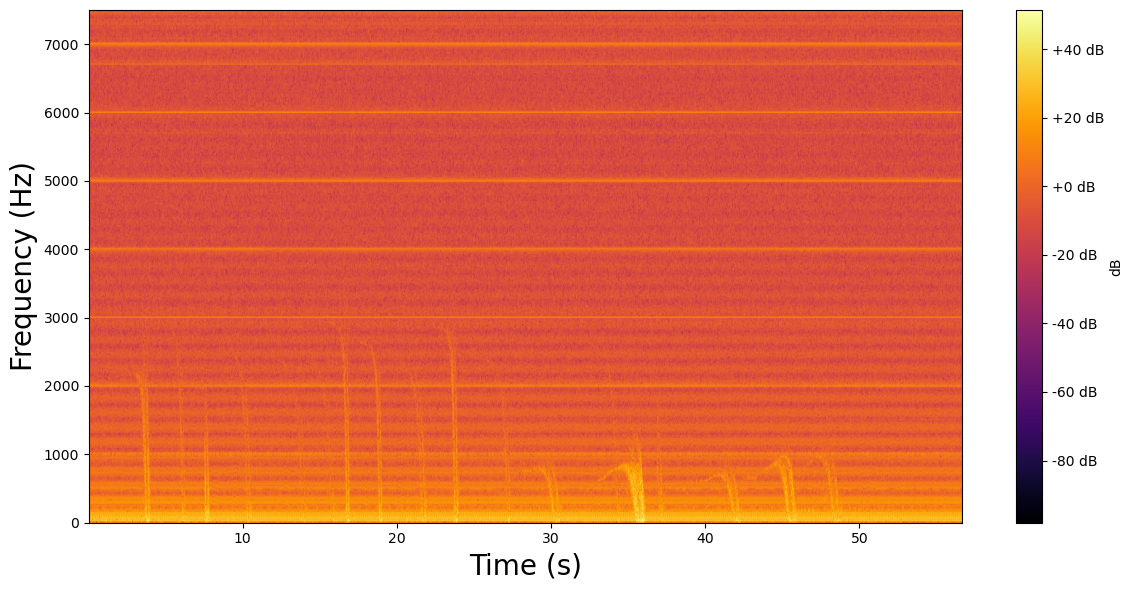

In [ ]:
# Create a spectrogram with adjusted parameters
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=2048, noverlap=1024)

# Change the colormap for better contrast
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)

# Adjust the color scale for dynamic range
plt.colorbar(label='dB', format='%+2.0f dB')

plt.xlabel('Time (s)', fontsize = '20')
plt.ylabel('Frequency (Hz)', fontsize = '20')
plt.tight_layout()
plt.savefig('Setup2LidOffSpectrogram.pdf', format = 'pdf')
plt.show()